In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import kagglehub
import os

dataset_dir = kagglehub.dataset_download("bobaaayoung/trafficvolumedatacsv")

# Find the CSV file within the directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break  # Stop after finding the first CSV file

print("Path to CSV file:", csv_file_path)

100%|██████████| 532k/532k [00:00<00:00, 933kB/s]

Extracting files...
Path to CSV file: /root/.cache/kagglehub/datasets/bobaaayoung/trafficvolumedatacsv/versions/1/TrafficVolumeData.csv


In [6]:
df = pd.read_csv(csv_file_path)
df.head()

date_time is_holiday  air_pollution_index  humidity  wind_speed  \
0  2012-10-02 09:00:00        NaN                  121        89           2   
1  2012-10-02 10:00:00        NaN                  178        67           3   
2  2012-10-02 11:00:00        NaN                  113        66           3   
3  2012-10-02 12:00:00        NaN                   20        66           3   
4  2012-10-02 13:00:00        NaN                  281        65           3   

   wind_direction  visibility_in_miles  dew_point  temperature  rain_p_h  \
0             329                    1          1       288.28       0.0   
1             330                    1          1       289.36       0.0   
2             329                    2          2       289.58       0.0   
3             329                    5          5       290.13       0.0   
4             329                    7          7       291.14       0.0   

   snow_p_h  clouds_all weather_type weather_description  traffic_volume  
0       0.0          40       Clouds    scattered clouds            5545  
1       0.0          75       Clouds       broken clouds            4516  
2       0.0          90       Clouds     overcast clouds            4767  
3       0.0          90       Clouds     overcast clouds            5026  
4       0.0          75       Clouds       broken clouds            4918

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [82]:
df.head().T  # Transpose the view

0                    1                    2  \
date_time            2012-10-02 09:00:00  2012-10-02 10:00:00  2012-10-02 11:00:00   
is_holiday                            No                   No                   No   
air_pollution_index                  121                  178                  113   
humidity                              89                   67                   66   
wind_speed                             2                    3                    3   
wind_direction                       329                  330                  329   
visibility_in_miles                    1                    1                    2   
dew_point                              1                    1                    2   
temperature                       288.28               289.36               289.58   
rain_p_h                             0.0                  0.0                  0.0   
snow_p_h                             0.0                  0.0                  0.0   
clouds_all                            40                   75                   90   
weather_type                      Clouds               Clouds               Clouds   
weather_description     scattered clouds        broken clouds      overcast clouds   
traffic_volume                      5545                 4516                 4767   

                                       3                    4  
date_time            2012-10-02 12:00:00  2012-10-02 13:00:00  
is_holiday                            No                   No  
air_pollution_index                   20                  281  
humidity                              66                   65  
wind_speed                             3                    3  
wind_direction                       329                  329  
visibility_in_miles                    5                    7  
dew_point                              5                    7  
temperature                       290.13               291.14  
rain_p_h                             0.0                  0.0  
snow_p_h                             0.0                  0.0  
clouds_all                            90                   75  
weather_type                      Clouds               Clouds  
weather_description      overcast clouds        broken clouds  
traffic_volume                      5026                 4918

In [79]:
df.head().style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '8pt')]},
    {'selector': 'td', 'props': [('font-size', '8pt')]}
])

In [8]:
# Null values
null_values = df.isnull().sum()
print("Null values:\n", null_values)


Null values:
 date_time                  0
is_holiday             33707
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
traffic_volume             0
dtype: int64


Support for third party widgets will remain active for the duration of the session. To disable support:

In [9]:
# List out all the unique values in the is_holiday column
unique_values = df['is_holiday'].unique()
print("Unique values in is_holiday column:", unique_values)

Unique values in is_holiday column: [nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


In [10]:
# Replace the NaN in is_holiday to "No"
df['is_holiday'].fillna('No', inplace=True)

<ipython-input-10-6556c8b017d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['is_holiday'].fillna('No', inplace=True)


In [11]:
# Null values
null_values = df.isnull().sum()
print("Null values:\n", null_values)

# Unique values
unique_values = df.nunique()
print("\nUnique values:\n", unique_values)

# Numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_cols)

# Categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Null values:
 date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

Unique values:
 date_time              28589
is_holiday                12
air_pollution_index      290
humidity                  88
wind_speed                17
wind_direction           361
visibility_in_miles        9
dew_point                  9
temperature             5611
rain_p_h                 353
snow_p_h                  12
clouds_all                60
weather_type              11
weather_description       38
traffic_volume          6462
dtype: int64
Numerical columns: ['air_pollution_index', 'humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point', 'temperatu

In [12]:
# Convert the date_time column to datetime object
df_update_1 = df.copy()
df_update_1['date_time'] = pd.to_datetime(df['date_time'])

# Split date_time into two columns, date and time
df_update_1['date'] = df_update_1['date_time'].dt.date
df_update_1['time'] = df_update_1['date_time'].dt.time

# Bring the date and time columns to the front of the dataframe
df_update_1 = df_update_1[['date_time','date', 'time'] + [col for col in df_update_1.columns if col not in ['date_time', 'date', 'time']]]


In [13]:
df_update_1.head()

date_time        date      time is_holiday  air_pollution_index  \
0 2012-10-02 09:00:00  2012-10-02  09:00:00         No                  121   
1 2012-10-02 10:00:00  2012-10-02  10:00:00         No                  178   
2 2012-10-02 11:00:00  2012-10-02  11:00:00         No                  113   
3 2012-10-02 12:00:00  2012-10-02  12:00:00         No                   20   
4 2012-10-02 13:00:00  2012-10-02  13:00:00         No                  281   

   humidity  wind_speed  wind_direction  visibility_in_miles  dew_point  \
0        89           2             329                    1          1   
1        67           3             330                    1          1   
2        66           3             329                    2          2   
3        66           3             329                    5          5   
4        65           3             329                    7          7   

   temperature  rain_p_h  snow_p_h  clouds_all weather_type  \
0       288.28       0.0       0.0          40       Clouds   
1       289.36       0.0       0.0          75       Clouds   
2       289.58       0.0       0.0          90       Clouds   
3       290.13       0.0       0.0          90       Clouds   
4       291.14       0.0       0.0          75       Clouds   

  weather_description  traffic_volume  
0    scattered clouds            5545  
1       broken clouds            4516  
2     overcast clouds            4767  
3     overcast clouds            5026  
4       broken clouds            4918

In [14]:
# Create a function to categorize time into different periods
def categorize_time(time):
    if pd.isnull(time):
        return np.nan  # Handle missing values
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'time' column
df_update_2 = df_update_1.copy()
df_update_2['time_of_day'] = df_update_2['time'].apply(categorize_time)

cols = list(df_update_2.columns)
cols.remove('time_of_day')
cols.insert(cols.index('time') + 1, 'time_of_day')
df_update_2 = df_update_2[cols]


In [15]:
df_update_2.head()

date_time        date      time time_of_day is_holiday  \
0 2012-10-02 09:00:00  2012-10-02  09:00:00     Morning         No   
1 2012-10-02 10:00:00  2012-10-02  10:00:00     Morning         No   
2 2012-10-02 11:00:00  2012-10-02  11:00:00     Morning         No   
3 2012-10-02 12:00:00  2012-10-02  12:00:00   Afternoon         No   
4 2012-10-02 13:00:00  2012-10-02  13:00:00   Afternoon         No   

   air_pollution_index  humidity  wind_speed  wind_direction  \
0                  121        89           2             329   
1                  178        67           3             330   
2                  113        66           3             329   
3                   20        66           3             329   
4                  281        65           3             329   

   visibility_in_miles  dew_point  temperature  rain_p_h  snow_p_h  \
0                    1          1       288.28       0.0       0.0   
1                    1          1       289.36       0.0       0.0   
2                    2          2       289.58       0.0       0.0   
3                    5          5       290.13       0.0       0.0   
4                    7          7       291.14       0.0       0.0   

   clouds_all weather_type weather_description  traffic_volume  
0          40       Clouds    scattered clouds            5545  
1          75       Clouds       broken clouds            4516  
2          90       Clouds     overcast clouds            4767  
3          90       Clouds     overcast clouds            5026  
4          75       Clouds       broken clouds            4918

In [16]:
df_update_3 = df_update_2.copy()
# Convert 'date' column to datetime objects before using .dt accessor
df_update_3['date'] = pd.to_datetime(df_update_3['date'])
df_update_3['day_of_week'] = df_update_3['date'].dt.day_name()

# Bring day_of_week next to date
cols = list(df_update_3.columns)
cols.remove('day_of_week')
cols.remove('is_holiday')
cols.insert(cols.index('date') + 1, 'day_of_week')
cols.insert(cols.index('day_of_week') + 1, 'is_holiday')
df_update_3 = df_update_3[cols]


In [17]:
df_update_3.head()

date_time       date day_of_week is_holiday      time time_of_day  \
0 2012-10-02 09:00:00 2012-10-02     Tuesday         No  09:00:00     Morning   
1 2012-10-02 10:00:00 2012-10-02     Tuesday         No  10:00:00     Morning   
2 2012-10-02 11:00:00 2012-10-02     Tuesday         No  11:00:00     Morning   
3 2012-10-02 12:00:00 2012-10-02     Tuesday         No  12:00:00   Afternoon   
4 2012-10-02 13:00:00 2012-10-02     Tuesday         No  13:00:00   Afternoon   

   air_pollution_index  humidity  wind_speed  wind_direction  \
0                  121        89           2             329   
1                  178        67           3             330   
2                  113        66           3             329   
3                   20        66           3             329   
4                  281        65           3             329   

   visibility_in_miles  dew_point  temperature  rain_p_h  snow_p_h  \
0                    1          1       288.28       0.0       0.0   
1                    1          1       289.36       0.0       0.0   
2                    2          2       289.58       0.0       0.0   
3                    5          5       290.13       0.0       0.0   
4                    7          7       291.14       0.0       0.0   

   clouds_all weather_type weather_description  traffic_volume  
0          40       Clouds    scattered clouds            5545  
1          75       Clouds       broken clouds            4516  
2          90       Clouds     overcast clouds            4767  
3          90       Clouds     overcast clouds            5026  
4          75       Clouds       broken clouds            4918

In [18]:
df_update_4 = df_update_3.copy()

#more processing splitting data in day month year
df_update_4['day'] = df_update_4['date'].dt.day
df_update_4['month'] = df_update_4['date'].dt.month
df_update_4['year'] = df_update_4['date'].dt.year
df_update_4.drop(columns=['date'], inplace=True)


#making time machine readable
df_update_4['time'] = pd.to_datetime(df_update_4['time'], format='%H:%M:%S')
df_update_4['time'] = (
    df_update_4['time'].dt.hour +
    df_update_4['time'].dt.minute / 60 +
    df_update_4['time'].dt.second / 3600
)

cols = list(df_update_4.columns)
cols.remove('day')
cols.remove('month')
cols.remove('year')
cols.insert(cols.index('date_time') + 1, 'day')
cols.insert(cols.index('day') + 1, 'month')
cols.insert(cols.index('month') + 1, 'year')


df_update_4 = df_update_4[cols]
df_update_4.head()

date_time  day  month  year day_of_week is_holiday  time  \
0 2012-10-02 09:00:00    2     10  2012     Tuesday         No   9.0   
1 2012-10-02 10:00:00    2     10  2012     Tuesday         No  10.0   
2 2012-10-02 11:00:00    2     10  2012     Tuesday         No  11.0   
3 2012-10-02 12:00:00    2     10  2012     Tuesday         No  12.0   
4 2012-10-02 13:00:00    2     10  2012     Tuesday         No  13.0   

  time_of_day  air_pollution_index  humidity  ...  wind_direction  \
0     Morning                  121        89  ...             329   
1     Morning                  178        67  ...             330   
2     Morning                  113        66  ...             329   
3   Afternoon                   20        66  ...             329   
4   Afternoon                  281        65  ...             329   

   visibility_in_miles  dew_point  temperature  rain_p_h  snow_p_h  \
0                    1          1       288.28       0.0       0.0   
1                    1          1       289.36       0.0       0.0   
2                    2          2       289.58       0.0       0.0   
3                    5          5       290.13       0.0       0.0   
4                    7          7       291.14       0.0       0.0   

   clouds_all  weather_type weather_description traffic_volume  
0          40        Clouds    scattered clouds           5545  
1          75        Clouds       broken clouds           4516  
2          90        Clouds     overcast clouds           4767  
3          90        Clouds     overcast clouds           5026  
4          75        Clouds       broken clouds           4918  

[5 rows x 21 columns]

In [19]:
df_update_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            33750 non-null  datetime64[ns]
 1   day                  33750 non-null  int32         
 2   month                33750 non-null  int32         
 3   year                 33750 non-null  int32         
 4   day_of_week          33750 non-null  object        
 5   is_holiday           33750 non-null  object        
 6   time                 33750 non-null  float64       
 7   time_of_day          33750 non-null  object        
 8   air_pollution_index  33750 non-null  int64         
 9   humidity             33750 non-null  int64         
 10  wind_speed           33750 non-null  int64         
 11  wind_direction       33750 non-null  int64         
 12  visibility_in_miles  33750 non-null  int64         
 13  dew_point            33750 non-

In [20]:
df_update_5 = df_update_4.copy()
y = df_update_5['traffic_volume']
df_update_5.drop(columns = ['traffic_volume'], inplace = True)


In [21]:
df_update_5.head()

date_time  day  month  year day_of_week is_holiday  time  \
0 2012-10-02 09:00:00    2     10  2012     Tuesday         No   9.0   
1 2012-10-02 10:00:00    2     10  2012     Tuesday         No  10.0   
2 2012-10-02 11:00:00    2     10  2012     Tuesday         No  11.0   
3 2012-10-02 12:00:00    2     10  2012     Tuesday         No  12.0   
4 2012-10-02 13:00:00    2     10  2012     Tuesday         No  13.0   

  time_of_day  air_pollution_index  humidity  wind_speed  wind_direction  \
0     Morning                  121        89           2             329   
1     Morning                  178        67           3             330   
2     Morning                  113        66           3             329   
3   Afternoon                   20        66           3             329   
4   Afternoon                  281        65           3             329   

   visibility_in_miles  dew_point  temperature  rain_p_h  snow_p_h  \
0                    1          1       288.28       0.0       0.0   
1                    1          1       289.36       0.0       0.0   
2                    2          2       289.58       0.0       0.0   
3                    5          5       290.13       0.0       0.0   
4                    7          7       291.14       0.0       0.0   

   clouds_all weather_type weather_description  
0          40       Clouds    scattered clouds  
1          75       Clouds       broken clouds  
2          90       Clouds     overcast clouds  
3          90       Clouds     overcast clouds  
4          75       Clouds       broken clouds

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create a copy of the DataFrame
df_scaled = df_update_4.copy() # Replace with any update level (But probably the latest one)

# Apply standard scaling to numerical columns
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Apply label encoding to categorical columns
for col in categorical_cols + ['day_of_week'] + ['time_of_day']:
    le = LabelEncoder()
    df_scaled[col] = le.fit_transform(df_scaled[col])

# Encoding day, month, year
for col in ['day', 'month', 'year']:
    le = LabelEncoder()
    df_scaled[col] = le.fit_transform(df_scaled[col])

df_scaled.head()

date_time  day  month  year  day_of_week  is_holiday  time  time_of_day  \
0          0    1      9     0            5           7   9.0            2   
1          1    1      9     0            5           7  10.0            2   
2          2    1      9     0            5           7  11.0            2   
3          3    1      9     0            5           7  12.0            0   
4          4    1      9     0            5           7  13.0            0   

   air_pollution_index  humidity  ...  wind_direction  visibility_in_miles  \
0            -0.404153  1.055720  ...        1.297362            -1.552441   
1             0.276572 -0.249763  ...        1.307378            -1.552441   
2            -0.499693 -0.309103  ...        1.297362            -1.163334   
3            -1.610349 -0.309103  ...        1.297362             0.003989   
4             1.506654 -0.368443  ...        1.297362             0.782204   

   dew_point  temperature  rain_p_h  snow_p_h  clouds_all  weather_type  \
0  -1.552441     0.612030 -0.008384 -0.032546   -0.269063             1   
1  -1.552441     0.692536 -0.008384 -0.032546    0.631348             1   
2  -1.163334     0.708936 -0.008384 -0.032546    1.017238             1   
3   0.003989     0.749934 -0.008384 -0.032546    1.017238             1   
4   0.782204     0.825223 -0.008384 -0.032546    0.631348             1   

   weather_description  traffic_volume  
0                   24        1.157384  
1                    2        0.640677  
2                   19        0.766716  
3                   19        0.896771  
4                    2        0.842539  

[5 rows x 21 columns]

In [23]:
# Data Analysis Plots

data = df_update_4.copy()

In [24]:
# Create an 'hour' column first
data['hour'] = data['date_time'].dt.hour

# # Now plot with hour as hue
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=data, x='temperature', y='traffic_volume', alpha=0.3, hue='hour', palette='viridis')
# plt.title('Traffic Volume vs Temperature (Colored by Hour of Day)')
# plt.show()

# Time-Based patterns

# Daily Traffic Trends

In [25]:
# Daily Traffic Trends

# Depreciated
'''plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='time', y='traffic_volume', hue='time_of_day', ci=None)
plt.title('Hourly Traffic Volume Patterns by Time of Day')
plt.xticks(range(0, 24))
plt.show()'''

"plt.figure(figsize=(12, 6))\nsns.lineplot(data=data, x='time', y='traffic_volume', hue='time_of_day', ci=None)\nplt.title('Hourly Traffic Volume Patterns by Time of Day')\nplt.xticks(range(0, 24))\nplt.show()"

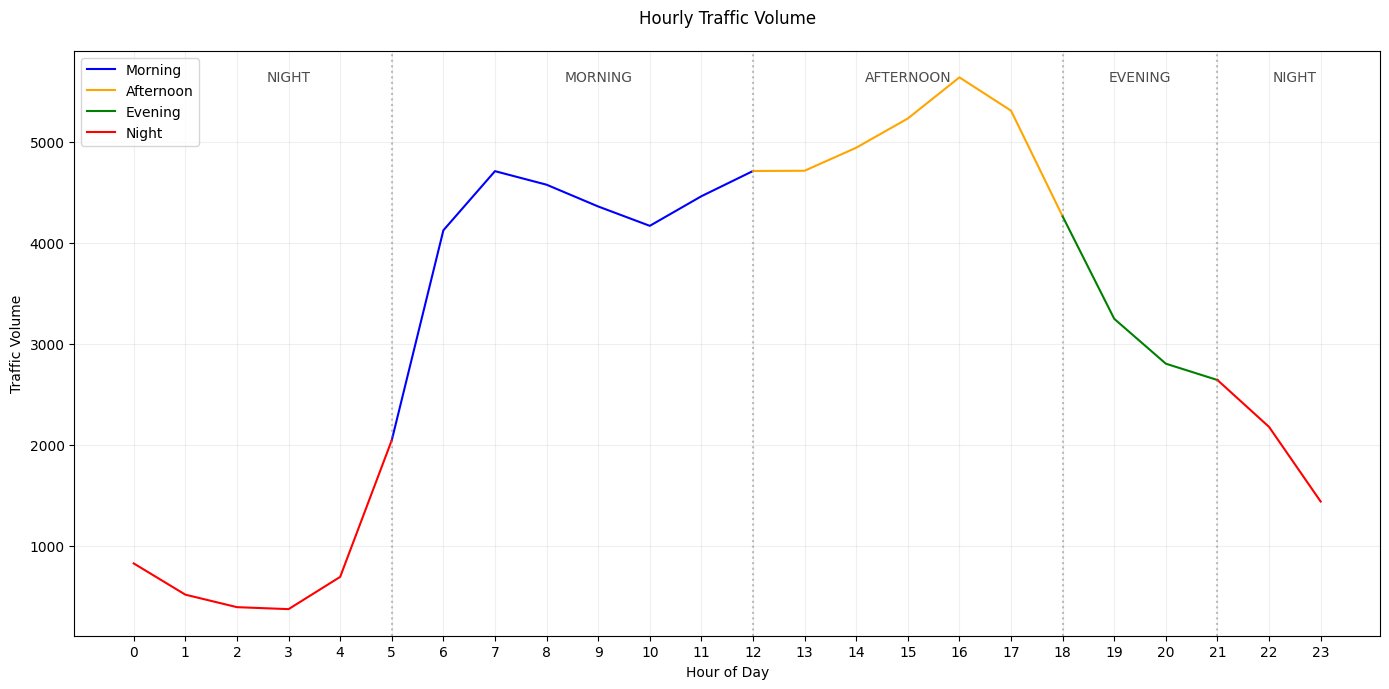

<Figure size 640x480 with 0 Axes>

In [59]:


plt.figure(figsize=(14, 7))

# Create separate time segments that don't wrap
segments = {
    'Morning': (5, 12.5),
    'Afternoon': (11.5, 18.5),
    'Evening': (17.5, 21.5),
    'Night1': (20.5, 24),  # First night segment
    'Night2': (0, 6)     # Second night segment
}

# Plot each segment independently
palette = {
    'Morning': 'blue',
    'Afternoon': 'orange',
    'Evening': 'green',
    'Night1': 'red',
    'Night2': 'red'  # Same color for both night segments
}

# Make sure both night segments have the same color
for segment, (start, end) in segments.items():
    mask = (data['time'] >= start) & (data['time'] < end)
    sns.lineplot(data=data[mask],
                x='time',
                y='traffic_volume',
                color=palette[segment],
                label=segment.replace('1', '').replace('2', '') if 'Night' in segment else segment,
                errorbar=None)

# Clean up legend to avoid duplicate night entries
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
plt.legend(unique_handles, unique_labels)

# Add vertical break lines at transitions
breakpoints = [5, 12, 18, 21]  # Transition times
for bp in breakpoints:
    plt.axvline(x=bp, color='gray', linestyle=':', alpha=0.5, linewidth=1.5)

# Add labels for each time segment
plt.text(3, plt.ylim()[1]*0.95, 'NIGHT', ha='center', alpha=0.7)
plt.text(9, plt.ylim()[1]*0.95, 'MORNING', ha='center', alpha=0.7)
plt.text(15, plt.ylim()[1]*0.95, 'AFTERNOON', ha='center', alpha=0.7)
plt.text(19.5, plt.ylim()[1]*0.95, 'EVENING', ha='center', alpha=0.7)
plt.text(22.5, plt.ylim()[1]*0.95, 'NIGHT', ha='center', alpha=0.7)

plt.title('Hourly Traffic Volume', pad=20)
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.xticks(range(0, 24))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

plt.savefig('hourly_traffic_volume.jpg', dpi=300)

# Weather Impacts on volume

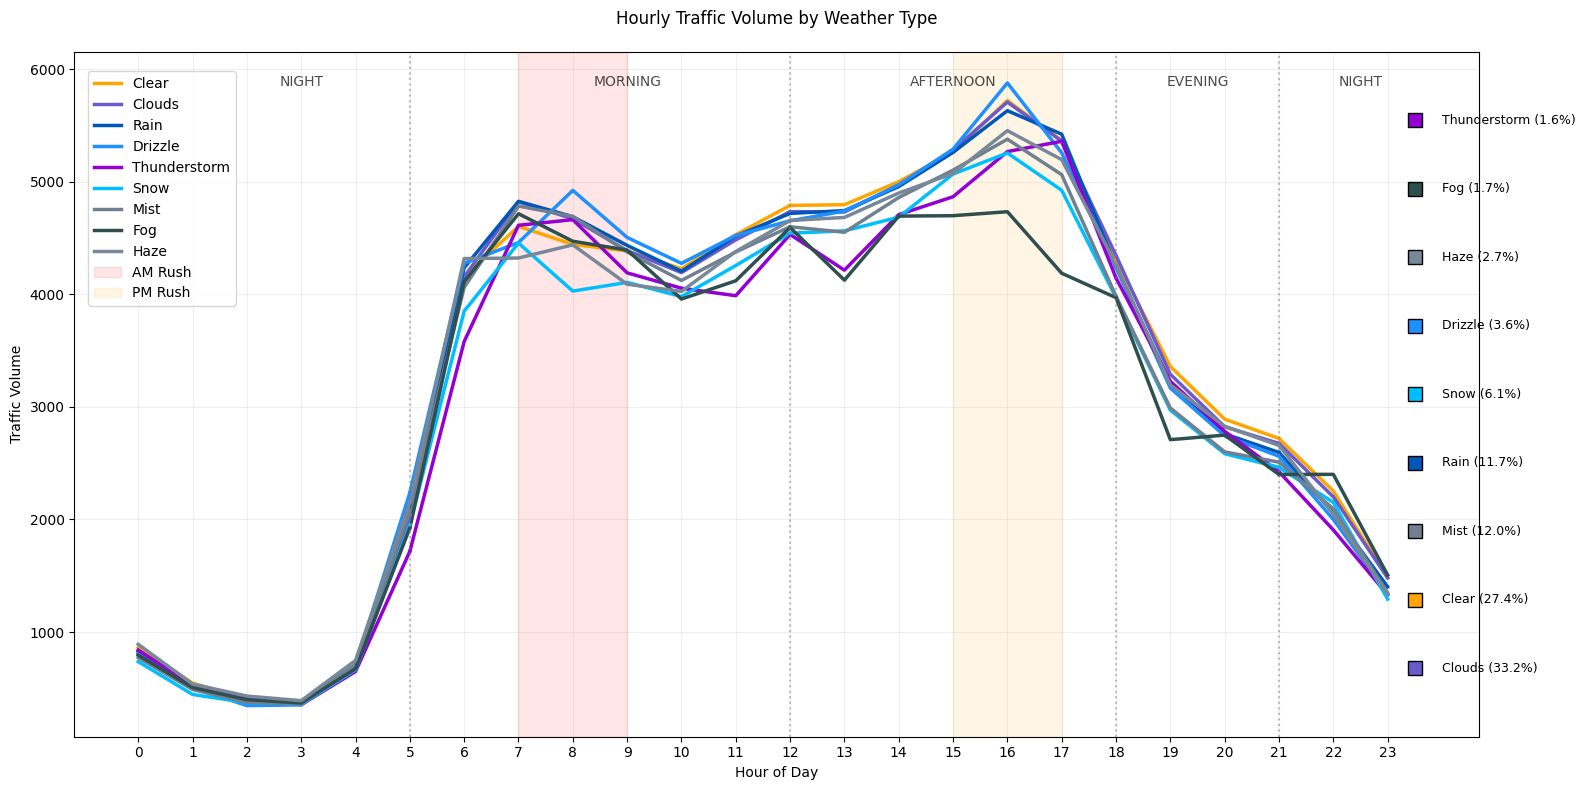

<Figure size 640x480 with 0 Axes>

In [61]:


plt.figure(figsize=(16, 8))

# 1. Define time segments
segments = {
    'Morning': (5, 12.5),
    'Afternoon': (11.5, 18.5),
    'Evening': (17.5, 21.5),
    'Night1': (20.5, 24),
    'Night2': (0, 6)
}

# 2. Define high-contrast weather palette
weather_palette_high_contrast = {
    'Clear': '#FFA500',        # Vibrant orange
    'Clouds': '#6A5ACD',       # Slate blue
    'Rain': '#0057B8',         # Deep blue
    'Drizzle': '#1E90FF',      # Bright blue
    'Thunderstorm': '#9400D3', # Purple
    'Snow': '#00BFFF',         # Deep sky blue
    'Mist': '#708090',         # Slate gray
    'Fog': '#2F4F4F',         # Dark slate gray
    'Haze': '#778899'         # Light slate gray
}

# 3. Plot each time segment with weather colors
for segment, (start, end) in segments.items():
    mask = (data['time'] >= start) & (data['time'] < end)
    segment_data = data[mask]

    for weather_type, color in weather_palette_high_contrast.items():
        weather_mask = segment_data['weather_type'] == weather_type
        if weather_mask.any():
            sns.lineplot(
                data=segment_data[weather_mask],
                x='time',
                y='traffic_volume',
                color=color,
                label=weather_type if segment == 'Morning' else '',
                errorbar=None,
                linewidth=2.5
            )

# 4. Add visual time segment breaks
breakpoints = [5, 12, 18, 21]
for bp in breakpoints:
    plt.axvline(x=bp, color='gray', linestyle=':', alpha=0.5, linewidth=1.5)

# 5. Add time period labels
plt.text(3, plt.ylim()[1]*0.95, 'NIGHT', ha='center', alpha=0.7)
plt.text(9, plt.ylim()[1]*0.95, 'MORNING', ha='center', alpha=0.7)
plt.text(15, plt.ylim()[1]*0.95, 'AFTERNOON', ha='center', alpha=0.7)
plt.text(19.5, plt.ylim()[1]*0.95, 'EVENING', ha='center', alpha=0.7)
plt.text(22.5, plt.ylim()[1]*0.95, 'NIGHT', ha='center', alpha=0.7)

# 6. Highlight rush hours
plt.axvspan(7, 9, alpha=0.1, color='red', label='AM Rush')
plt.axvspan(15, 17, alpha=0.1, color='orange', label='PM Rush')

# Calculate and sort weather statistics
weather_stats = []
for weather_type, color in weather_palette_high_contrast.items():
    subset = data[data['weather_type'] == weather_type]
    if len(subset) > 0:
        weather_stats.append({
            'type': weather_type,
            'color': color,
            'freq': len(subset)/len(data),
            'count': len(subset)
        })

# Sort by frequency (highest first)
weather_stats.sort(key=lambda x: x['freq'], reverse=True)

# Create three columns for better organization
n_cols = 1
col_width = 8  # Hours per column
bottom_y = plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.1  # 10% from bottom

# Add spaced annotations
# y_spacing = (plt.ylim()[1] - plt.ylim()[0]) * 0.08  # 8% of y-range
# right_margin = 24.2  # X-position for labels

for i, stat in enumerate(weather_stats):
    col = i % n_cols
    row = i // n_cols

    # Position calculation
    x_pos = 23.5 + col * col_width
    y_pos = bottom_y + row * (plt.ylim()[1] - bottom_y) / (len(weather_stats)/n_cols)

    # Add colored square and text
    plt.plot(x_pos, y_pos, 's', markersize=10,
             color=stat['color'], markeredgecolor='black')
    plt.text(x_pos + 0.5, y_pos,
             f"{stat['type']} ({stat['freq']:.1%})",
             va='center',
             fontsize=9)

# 7. Final plot formatting
plt.title('Hourly Traffic Volume by Weather Type', pad=20)
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.xticks(range(0, 24))
plt.grid(alpha=0.2)

# 8. Custom legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
           bbox_to_anchor=(0.12, 0.8),
            loc='right')

plt.tight_layout()
plt.show()

plt.savefig('Hourly_traffic_voume_by_weather.jpg', dpi=300)

In [28]:
# Example significance test
from scipy.stats import ttest_ind

clear_am = data[(data['weather_type']=='Clear') & (data['time'].between(7,9))]['traffic_volume']
rain_am = data[(data['weather_type']=='Rain') & (data['time'].between(7,9))]['traffic_volume']
print(ttest_ind(clear_am, rain_am))  # Check if difference is statistically significant

TtestResult(statistic=np.float64(-1.8577412467959389), pvalue=np.float64(0.06340682913722832), df=np.float64(1461.0))


In [29]:
# Convert 'day_of_week' to weekday/weekend
weekday_df = data.copy()
weekday_df['day_type'] = weekday_df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Verify
print(weekday_df['day_type'].value_counts())

day_type
Weekday    24192
Weekend     9558
Name: count, dtype: int64


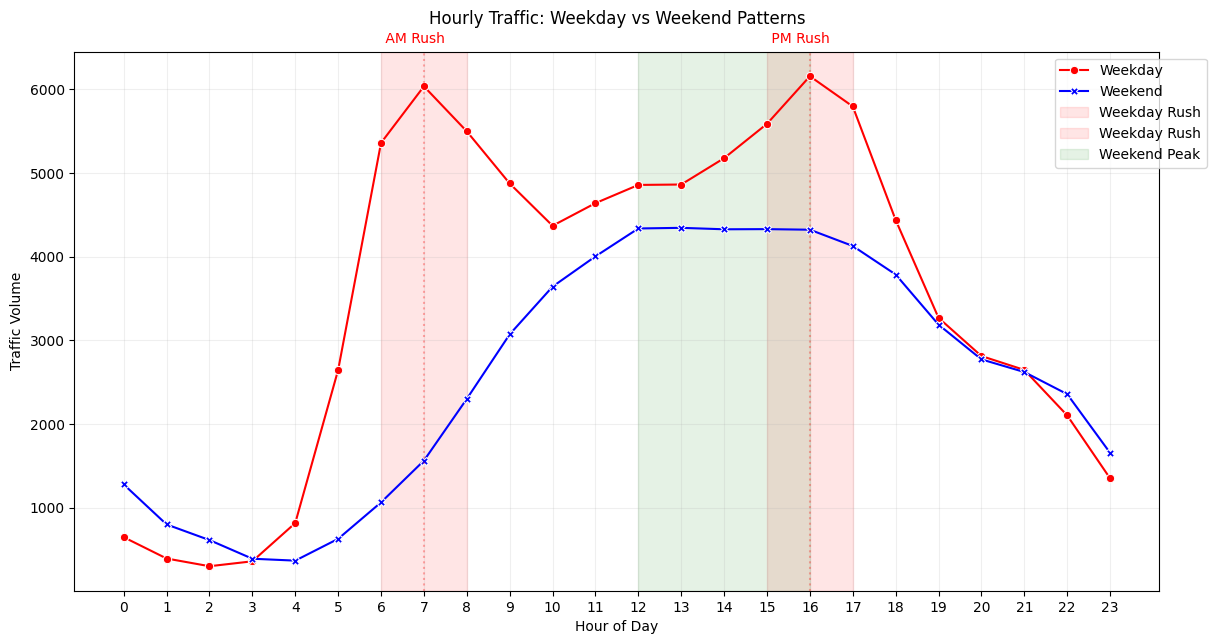

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=weekday_df,
    x='hour',
    y='traffic_volume',
    hue='day_type',
    style='day_type',  # Adds different line styles
    markers=True,      # Shows data points
    dashes=False,      # Solid lines
    errorbar=None,     # Silence warning
    palette={'Weekday':'red', 'Weekend':'blue'}  # Custom colors
)

# Customize plot
plt.title('Hourly Traffic: Weekday vs Weekend Patterns', pad=20)
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)

# Highlight key differences
plt.axvspan(6, 8, alpha=0.1, color='red', label='Weekday Rush')
plt.axvspan(15, 17, alpha=0.1, color='red', label='Weekday Rush')
plt.axvspan(12, 16, alpha=0.1, color='green', label='Weekend Peak')
plt.xticks(range(0, 24))


# Add vertical lines for rush hours
plt.axvline(x=7, color='red', linestyle=':', alpha=0.3)
plt.axvline(x=16, color='red', linestyle=':', alpha=0.3)
plt.text(6, df['traffic_volume'].max()*0.9, ' AM Rush', color='red')
plt.text(15, df['traffic_volume'].max()*0.9, ' PM Rush', color='red')
plt.grid(alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

plt.savefig('Hourly_weekday_vs_weekend.jpg', dpi=300)

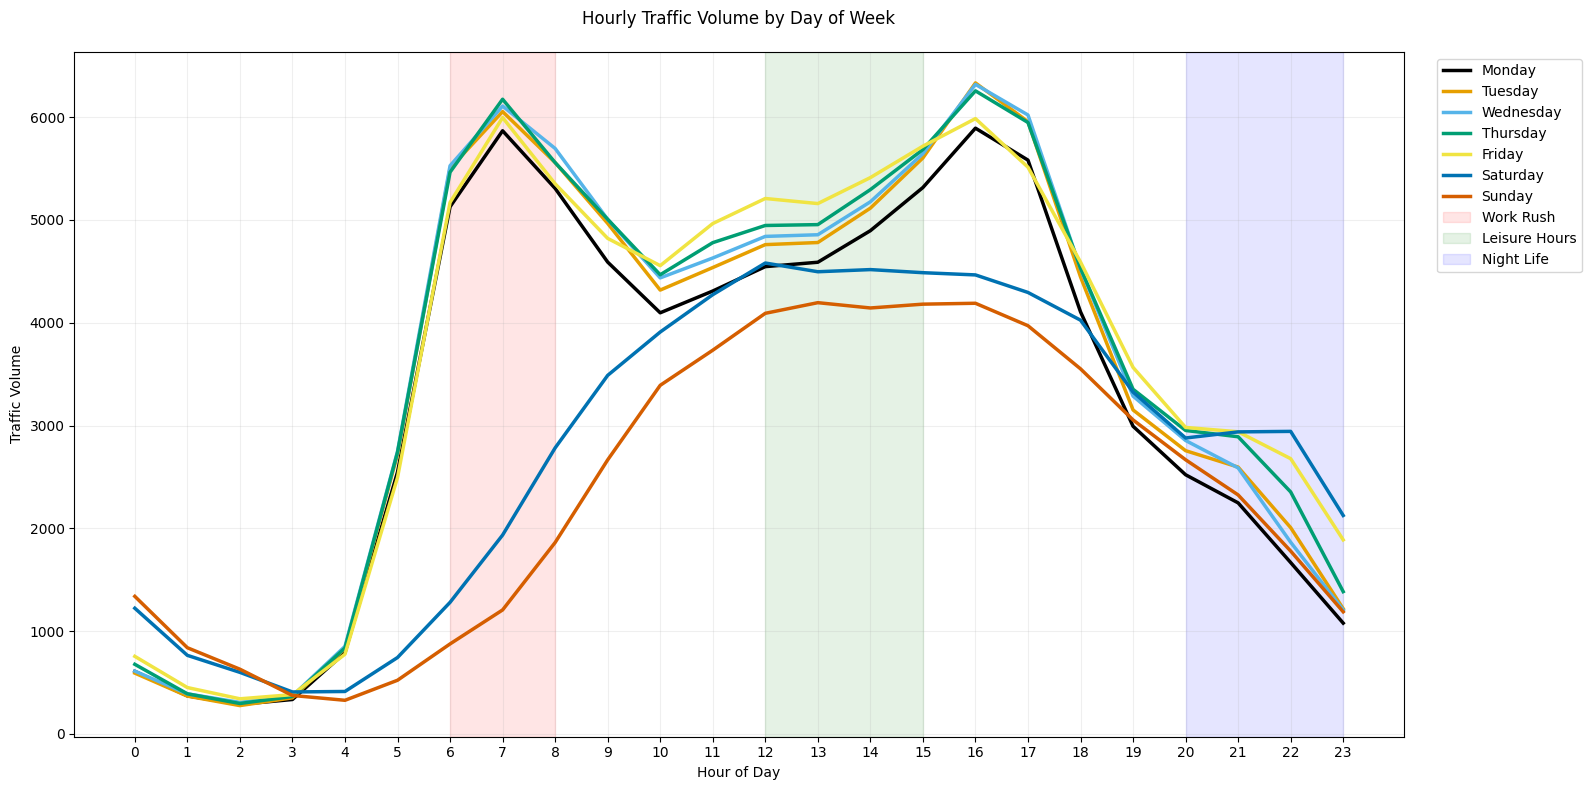

<Figure size 640x480 with 0 Axes>

In [63]:
# Graphs for all days of the week
plt.figure(figsize=(16, 8))

# Define ordering and palette
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# palette = sns.color_palette("husl", n_colors=7)  # Distinct colors for each day
palette = {
    'Monday': '#000000',      # Black
    'Tuesday': '#E69F00',     # Orange
    'Wednesday': '#56B4E9',   # Sky Blue
    'Thursday': '#009E73',    # Bluish Green
    'Friday': '#F0E442',      # Yellow
    'Saturday': '#0072B2',    # Blue
    'Sunday': '#D55E00'       # Vermillion
}
# Plot each day's trend
sns.lineplot(
    data=weekday_df,
    x='time',
    y='traffic_volume',
    hue='day_of_week',
    hue_order=days_order,
    palette=palette,
    errorbar=None,
    linewidth=2.5
)

# Highlight key patterns
plt.axvspan(6, 8, alpha=0.1, color='red', label='Work Rush')
plt.axvspan(12, 15, alpha=0.1, color='green', label='Leisure Hours')
plt.axvspan(20, 23, alpha=0.1, color='blue', label='Night Life')

# Annotations
# plt.text(8, plt.ylim()[1]*0.9, 'Commute Crunch', color='red', ha='center')
# plt.text(13.5, plt.ylim()[1]*0.7, 'Midday Activity', color='green', ha='center')
# plt.text(21.5, plt.ylim()[1]*0.5, 'Evening Out', color='blue', ha='center')

plt.title('Hourly Traffic Volume by Day of Week', pad=20)
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.xticks(range(0, 24))
plt.grid(alpha=0.2)
plt.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

plt.savefig('Hourly_traffic_volume_by_day_of_week.jpg', dpi=300)

In [32]:
def compare_two_days(day1, day2):
    """Compare traffic patterns between two specific days."""

    # Data validation
    valid_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if day1 not in valid_days or day2 not in valid_days:
        print(f"Invalid day name. Please choose from: {valid_days}")
        return

    # Prepare data
    df1 = weekday_df[weekday_df['day_of_week'] == day1]
    df2 = weekday_df[weekday_df['day_of_week'] == day2]

    # Create figure
    plt.figure(figsize=(14, 6))

    # Plot both days
    plt.plot(df1.groupby('time')['traffic_volume'].mean(),
             color='#1f77b4', linewidth=3, label=day1)
    plt.plot(df2.groupby('time')['traffic_volume'].mean(),
             color='#ff7f0e', linewidth=3, label=day2)

    # Highlight key differences
    max_traffic = max(df1['traffic_volume'].max(), df2['traffic_volume'].max())
    plt.axvspan(6, 8, alpha=0.1, color='red', label='Rush Hours')
    plt.axvspan(12, 15, alpha=0.1, color='green', label='Midday')

    # Calculate and display stats
    am_peak_diff = (df1[df1['time'].between(7,9)]['traffic_volume'].mean() -
                    df2[df2['time'].between(7,9)]['traffic_volume'].mean())

    plt.text(23, max_traffic*0.9,
             f"AM Peak Difference: {am_peak_diff:.0f} vehicles\n({day1} vs {day2})",
             ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))

    # Formatting
    plt.title(f'Traffic Comparison: {day1} vs {day2}', pad=20, fontsize=14)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Traffic Volume', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(alpha=0.2)
    plt.legend(bbox_to_anchor=(1.02, 1))
    plt.tight_layout()
    plt.show()

    # Statistical test
    from scipy.stats import ttest_ind
    t_stat, p_val = ttest_ind(df1['traffic_volume'], df2['traffic_volume'])
    print(f"\nStatistical Comparison:\nT-statistic = {t_stat:.2f}\nP-value = {p_val:.4f}")
    if p_val < 0.05:
        print("=> Significant difference between days (p < 0.05)")
    else:
        print("=> No significant difference (p ≥ 0.05)")



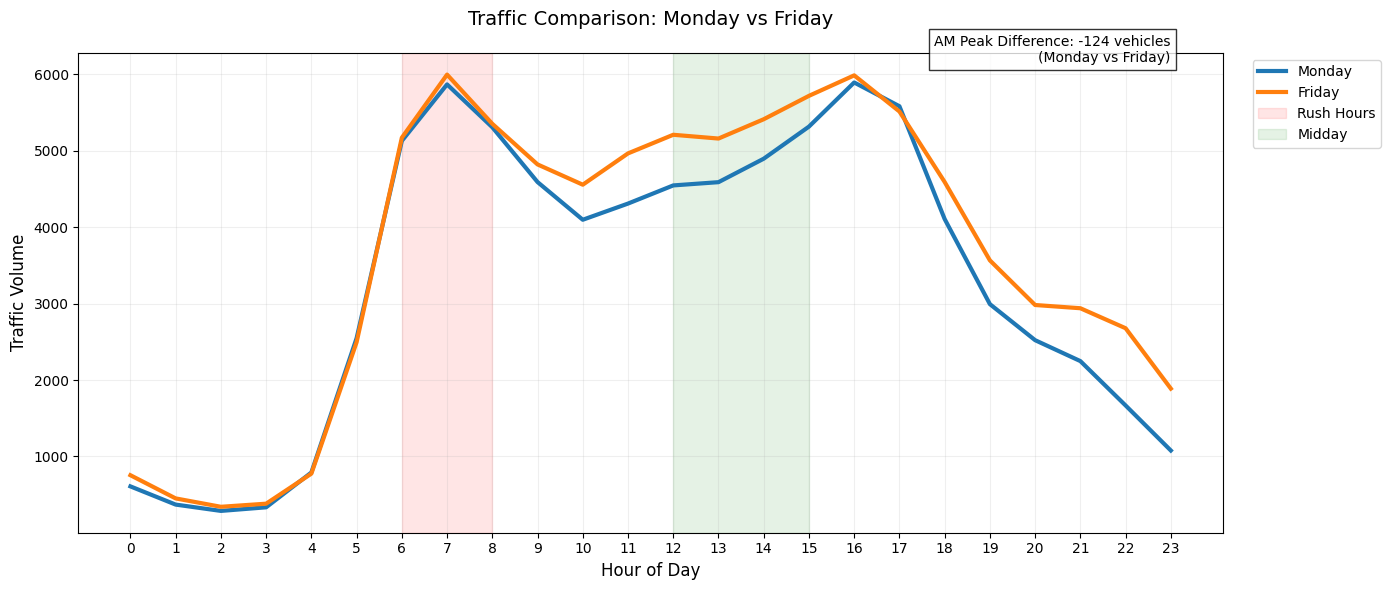


Statistical Comparison:
T-statistic = -6.83
P-value = 0.0000
=> Significant difference between days (p < 0.05)


In [64]:
compare_two_days('Monday', 'Friday')

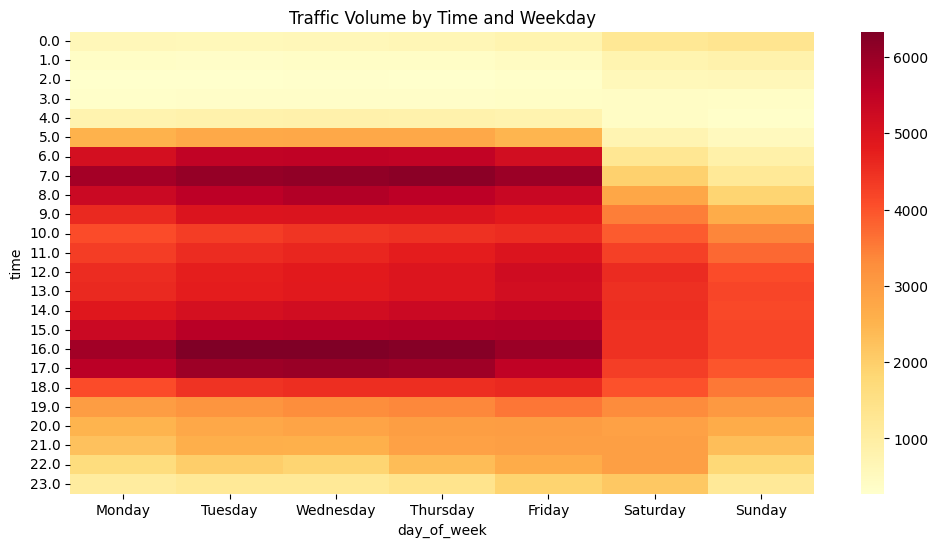

In [65]:
pivot = weekday_df.pivot_table(index='time', columns='day_of_week',
                              values='traffic_volume')[days_order]
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlOrRd", annot=False)
plt.title('Traffic Volume by Time and Weekday')

plt.savefig('Traffic_volume_by_time_&_weekday_heatmap1.jpg', dpi=300)

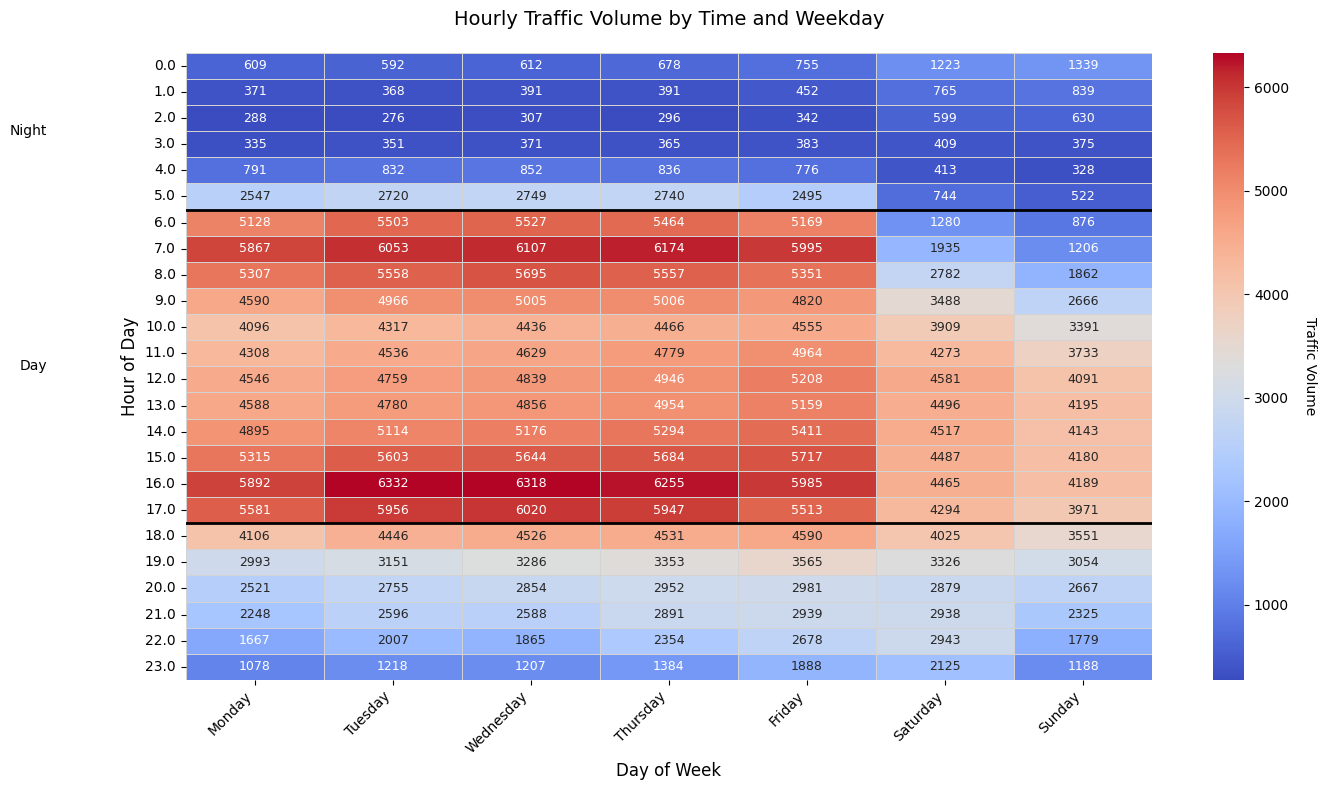

<Figure size 640x480 with 0 Axes>

In [66]:
plt.figure(figsize=(14, 8))

# Create pivot table for heatmap
heatmap_data = weekday_df.pivot_table(
    index='time',
    columns='day_of_week',
    values='traffic_volume',
    aggfunc='mean'
)[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Create heatmap with annotations
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',  # red-blue color gradient
    annot=True,      # Show values in cells
    fmt='.0f',       # Format as whole numbers
    annot_kws={'size': 9},
    linewidths=0.5,
    linecolor='lightgray'
)

# Add horizontal lines
for hour in [6, 18]:  # 6AM and 6PM
    plt.axhline(hour, color='black', linestyle='-', linewidth=2)
plt.text(-1, 3, 'Night', ha='right', va='center')
plt.text(-1, 12, 'Day', ha='right', va='center')

# Enhance readability
plt.title('Hourly Traffic Volume by Time and Weekday', pad=20, fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('Traffic Volume', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

plt.savefig('Traffic_volume_by_time_&_week_heatmap_coolwarm.jpg', dpi=300)

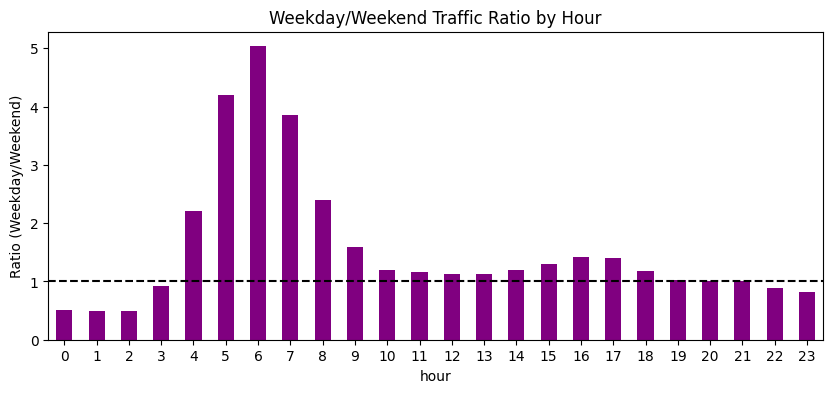

<Figure size 640x480 with 0 Axes>

In [67]:
# Calculate ratio of weekday to weekend traffic
hourly_ratio = weekday_df.groupby(['hour', 'day_type'])['traffic_volume'].mean().unstack()
hourly_ratio['Weekday_ratio'] = hourly_ratio['Weekday'] / hourly_ratio['Weekend']

plt.figure(figsize=(10, 4))
hourly_ratio['Weekday_ratio'].plot(kind='bar', color='purple')
plt.axhline(y=1, color='black', linestyle='--')
plt.title('Weekday/Weekend Traffic Ratio by Hour')
plt.ylabel('Ratio (Weekday/Weekend)')
plt.xticks(rotation=0)
plt.show()

plt.savefig('Weekday_weekend_traffic_ratio.jpg', dpi=300)

<Axes: xlabel='time_of_day', ylabel='traffic_volume'>

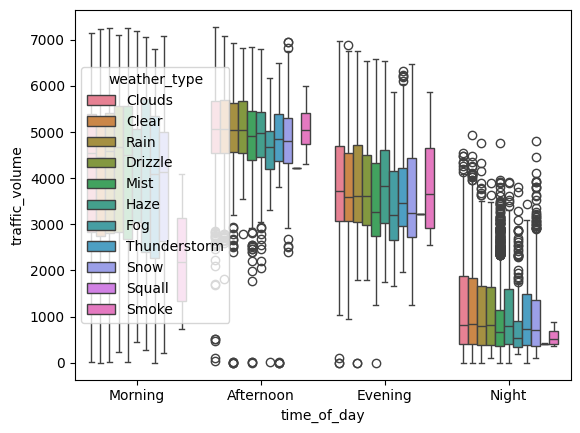

In [37]:
# Weather Impact
sns.boxplot(data=data, x='time_of_day', y='traffic_volume', hue='weather_type')

In [38]:
plt.figure(figsize=(14, 8))

# Force consistent box widths and styles
boxprops = {
    'linestyle': '-',
    'linewidth': 1.5,
    'edgecolor': 'black'
}

# Create uniform boxes with varying colors
sns.boxplot(
    data=weekday_df,
    x='weather_type',
    y='traffic_volume',
    order=weather_order,
    palette='Set3',  # Distinct but uniform colors
    width=0.6,       # Same width for all
    showfliers=False, # Remove outliers for consistency
    boxprops=boxprops,
    whiskerprops={'linewidth': 1.5},
    capprops={'linewidth': 1.5},
    medianprops={'color': 'black', 'linewidth': 2}
)

plt.title('Consistent Traffic Patterns Across Weather Types', pad=20)
plt.xlabel('Weather Type', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

NameError: name 'weather_order' is not defined

<Figure size 1400x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

<Figure size 1800x1200 with 0 Axes>

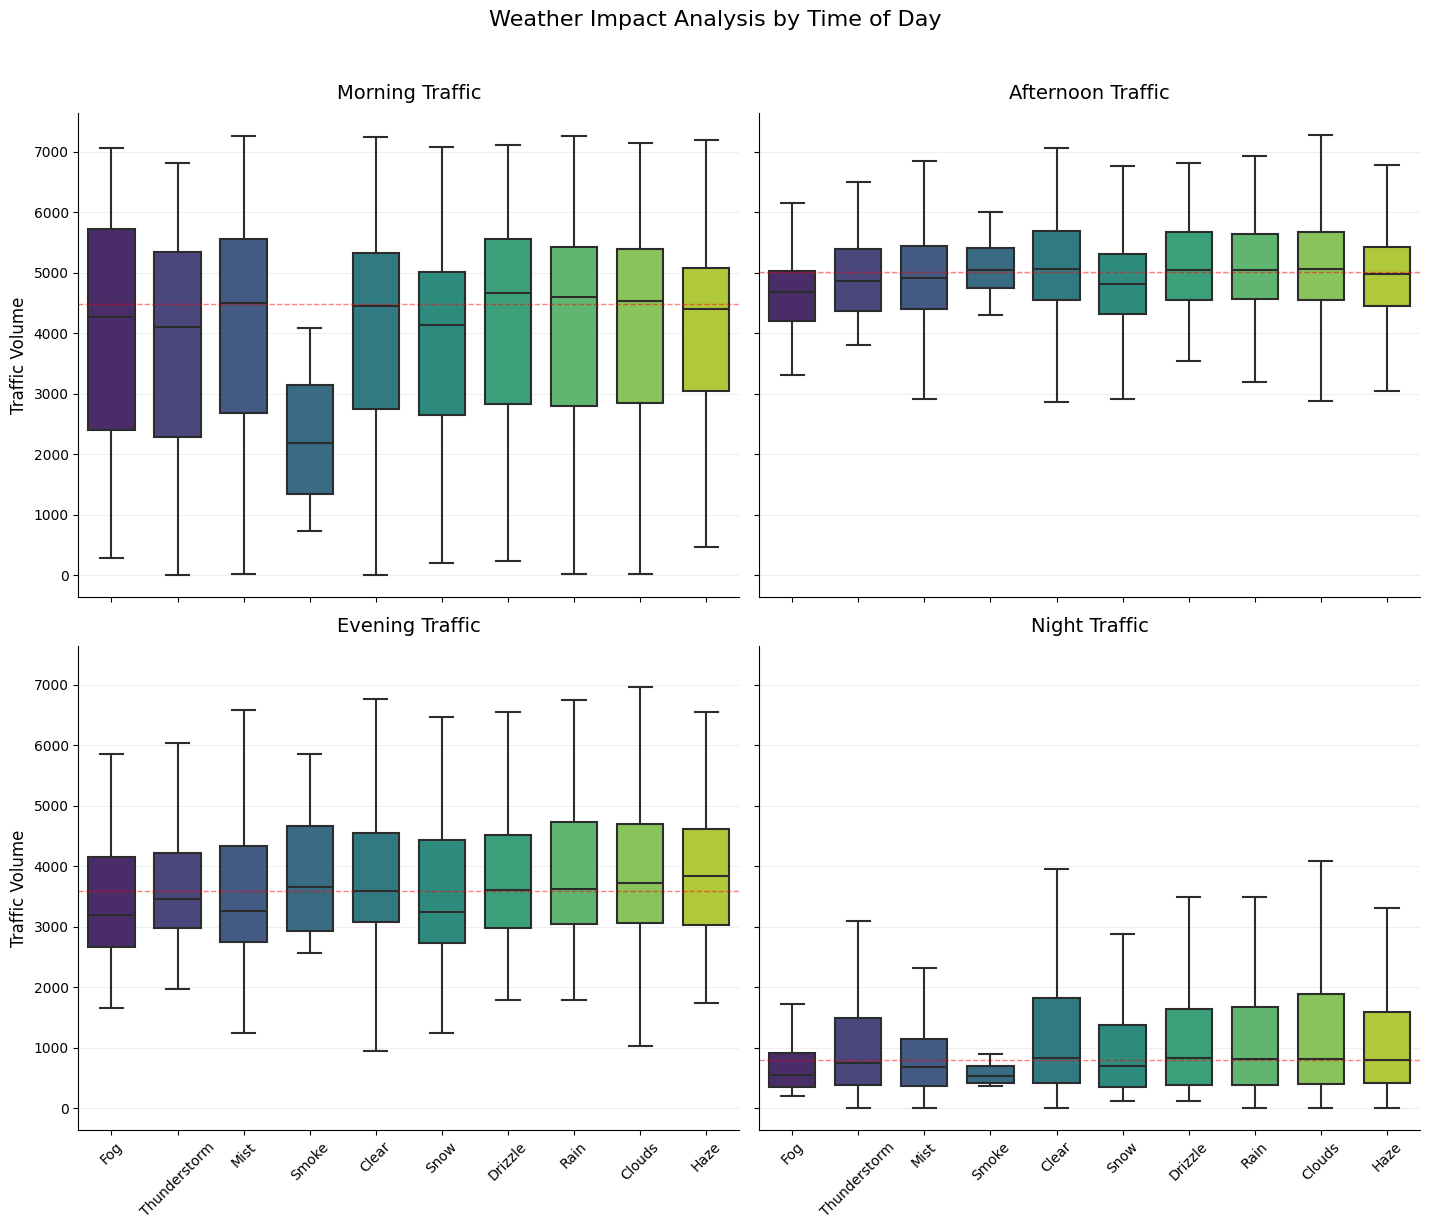

<Figure size 640x480 with 0 Axes>

In [68]:
# Filter out Squall
filtered_df = weekday_df[weekday_df['weather_type'] != 'Squall']

# Get updated weather order without Squall
weather_order = filtered_df.groupby('weather_type')['traffic_volume'].median().sort_values().index

# Create plot grid
plt.figure(figsize=(18, 12))
g = sns.FacetGrid(filtered_df,
                 col='time_of_day',
                 col_wrap=2,
                 col_order=['Morning', 'Afternoon', 'Evening', 'Night'],
                 height=6,
                 aspect=1.2)

# Plot consistent boxplots
g.map_dataframe(sns.boxplot,
                x='weather_type',
                y='traffic_volume',
                order=weather_order,
                palette='viridis',
                width=0.7,
                showfliers=False,
                linewidth=1.5)

# Enhance readability
for ax, time in zip(g.axes.flat, ['Morning', 'Afternoon', 'Evening', 'Night']):
    ax.set_title(f'{time} Traffic', fontsize=14, pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('Traffic Volume', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.2)

    # Add overall median line
    time_median = filtered_df[filtered_df['time_of_day']==time]['traffic_volume'].median()
    ax.axhline(time_median, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.suptitle('Weather Impact Analysis by Time of Day', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

plt.savefig('Weather_impact_by_time_of_day.jpg', dpi=300)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

<Figure size 2400x600 with 0 Axes>

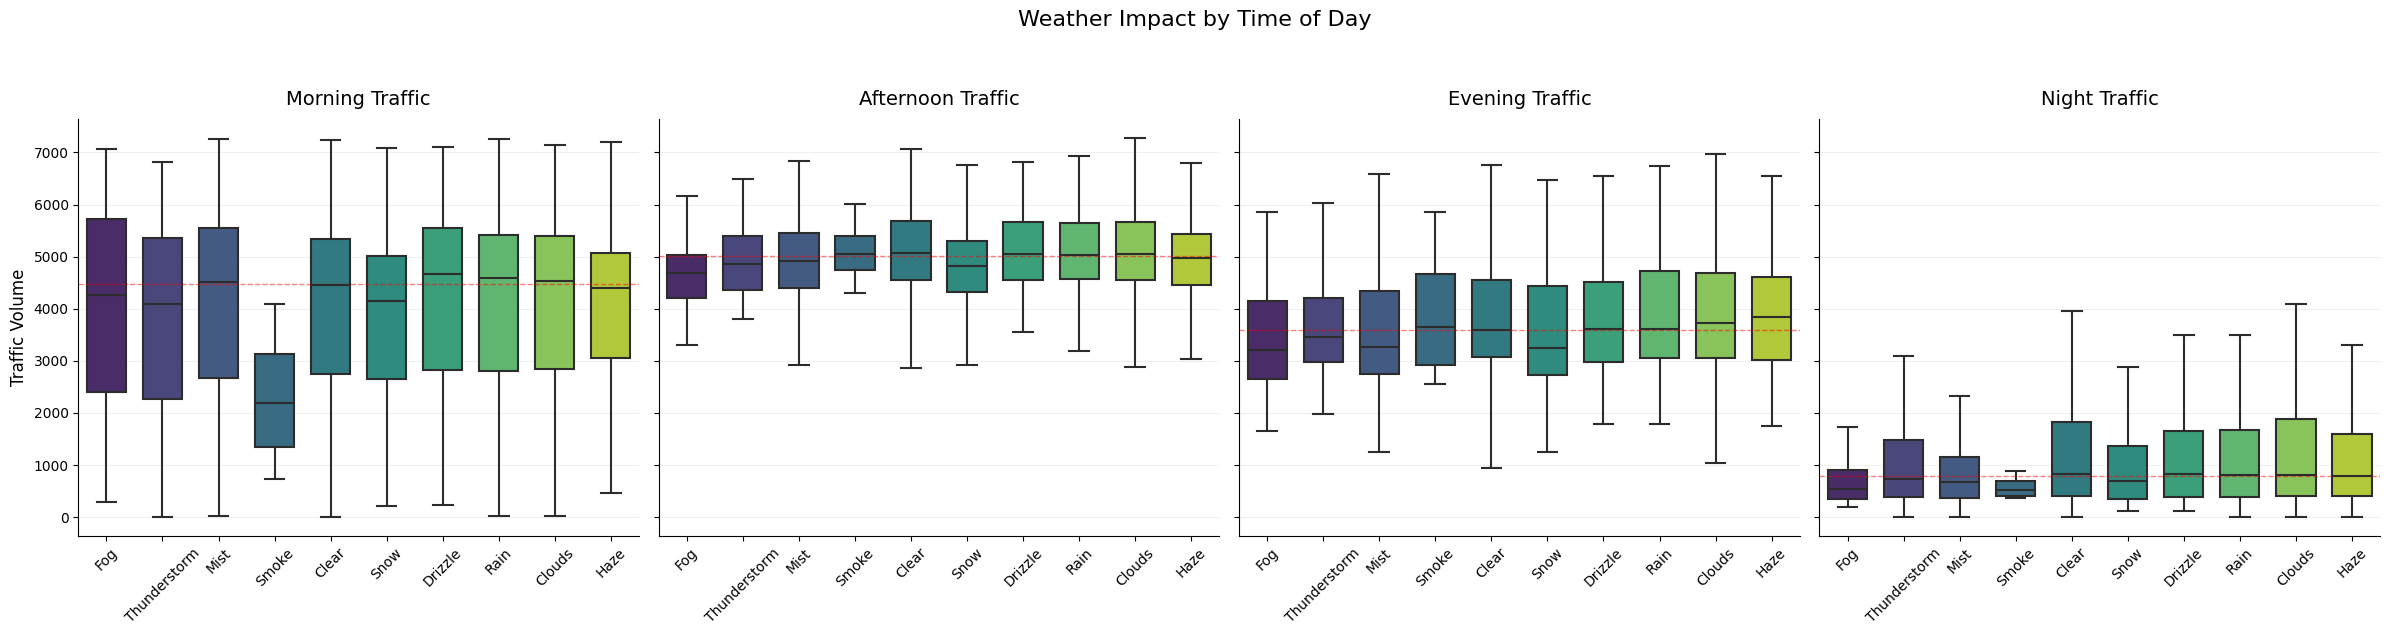

In [83]:
# Filter out Squall
# filtered_df = weekday_df[weekday_df['weather_type'] != 'Squall']

# Get updated weather order without Squall
weather_order = filtered_df.groupby('weather_type')['traffic_volume'].median().sort_values().index

# Create SINGLE ROW layout (1x4 grid)
plt.figure(figsize=(24, 6))  # Wider figure to accommodate side-by-side plots
g = sns.FacetGrid(filtered_df,
                 col='time_of_day',
                 col_wrap=4,  # Changed from 2 to 4 for single row
                 col_order=['Morning', 'Afternoon', 'Evening', 'Night'],
                 height=6,
                 aspect=1)

# Plot consistent boxplots
g.map_dataframe(sns.boxplot,
                x='weather_type',
                y='traffic_volume',
                order=weather_order,
                palette='viridis',
                width=0.7,
                showfliers=False,
                linewidth=1.5)

# Enhance readability
for ax, time in zip(g.axes.flat, ['Morning', 'Afternoon', 'Evening', 'Night']):
    ax.set_title(f'{time} Traffic', fontsize=14, pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('Traffic Volume' if time == 'Morning' else '', fontsize=12)  # Only label first plot's Y-axis
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.2)

    # Add overall median line
    time_median = filtered_df[filtered_df['time_of_day']==time]['traffic_volume'].median()
    ax.axhline(time_median, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.suptitle('Weather Impact by Time of Day', y=1.05, fontsize=16)
plt.tight_layout()

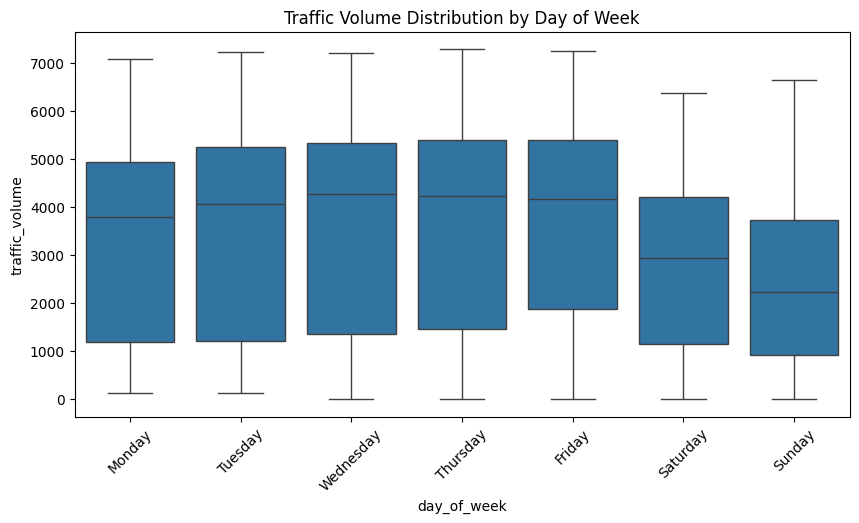

In [42]:
# Weekly Seasonality
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='day_of_week', y='traffic_volume', order=weekday_order)
plt.title('Traffic Volume Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()

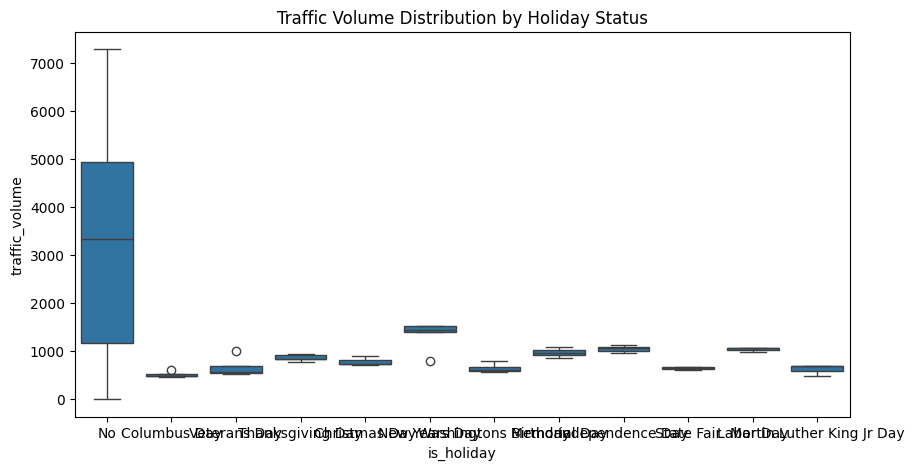

In [43]:
# Weather Impact
# Traffic times on holidays
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='is_holiday', y='traffic_volume')
plt.title('Traffic Volume Distribution by Holiday Status')
plt.show()

<ipython-input-44-d8defc6e774d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


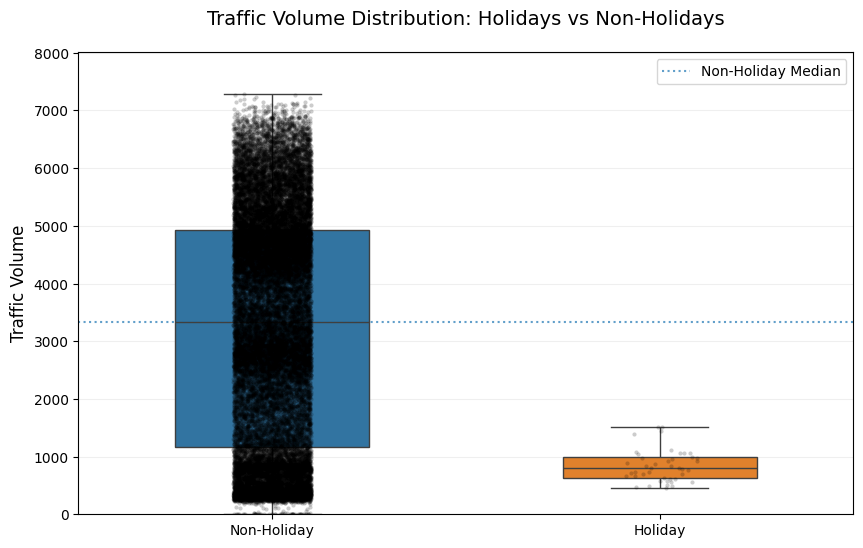

In [44]:
plt.figure(figsize=(10, 6))

# Create combined holiday category
weekday_df['holiday_status'] = weekday_df['is_holiday'].apply(
    lambda x: 'Holiday' if x != 'No' else 'Non-Holiday'
)

# Create boxplot
sns.boxplot(
    data=weekday_df,
    x='holiday_status',
    y='traffic_volume',
    order=['Non-Holiday', 'Holiday'],
    palette={'Non-Holiday': '#1f77b4', 'Holiday': '#ff7f0e'},
    width=0.5,
    showfliers=False  # Removes outliers for cleaner visualization
)

# Add stripplot for data density
sns.stripplot(
    data=weekday_df,
    x='holiday_status',
    y='traffic_volume',
    order=['Non-Holiday', 'Holiday'],
    color='black',
    alpha=0.2,
    size=3,
    jitter=True
)

# Add median comparison line
non_holiday_median = weekday_df[weekday_df['holiday_status'] == 'Non-Holiday']['traffic_volume'].median()
plt.axhline(non_holiday_median, color='#1f77b4', linestyle=':', alpha=0.7, label='Non-Holiday Median')

# Customize plot
plt.title('Traffic Volume Distribution: Holidays vs Non-Holidays', pad=20, fontsize=14)
plt.xlabel('')
plt.ylabel('Traffic Volume', fontsize=12)
plt.ylim(0, weekday_df['traffic_volume'].max() * 1.1)
plt.grid(axis='y', alpha=0.2)
plt.legend()

plt.show()

In [45]:
weekday_df.head()

date_time  day  month  year day_of_week is_holiday  time  \
0 2012-10-02 09:00:00    2     10  2012     Tuesday         No   9.0   
1 2012-10-02 10:00:00    2     10  2012     Tuesday         No  10.0   
2 2012-10-02 11:00:00    2     10  2012     Tuesday         No  11.0   
3 2012-10-02 12:00:00    2     10  2012     Tuesday         No  12.0   
4 2012-10-02 13:00:00    2     10  2012     Tuesday         No  13.0   

  time_of_day  air_pollution_index  humidity  ...  temperature  rain_p_h  \
0     Morning                  121        89  ...       288.28       0.0   
1     Morning                  178        67  ...       289.36       0.0   
2     Morning                  113        66  ...       289.58       0.0   
3   Afternoon                   20        66  ...       290.13       0.0   
4   Afternoon                  281        65  ...       291.14       0.0   

   snow_p_h  clouds_all  weather_type  weather_description  traffic_volume  \
0       0.0          40        Clouds     scattered clouds            5545   
1       0.0          75        Clouds        broken clouds            4516   
2       0.0          90        Clouds      overcast clouds            4767   
3       0.0          90        Clouds      overcast clouds            5026   
4       0.0          75        Clouds        broken clouds            4918   

   hour day_type holiday_status  
0     9  Weekday    Non-Holiday  
1    10  Weekday    Non-Holiday  
2    11  Weekday    Non-Holiday  
3    12  Weekday    Non-Holiday  
4    13  Weekday    Non-Holiday  

[5 rows x 24 columns]

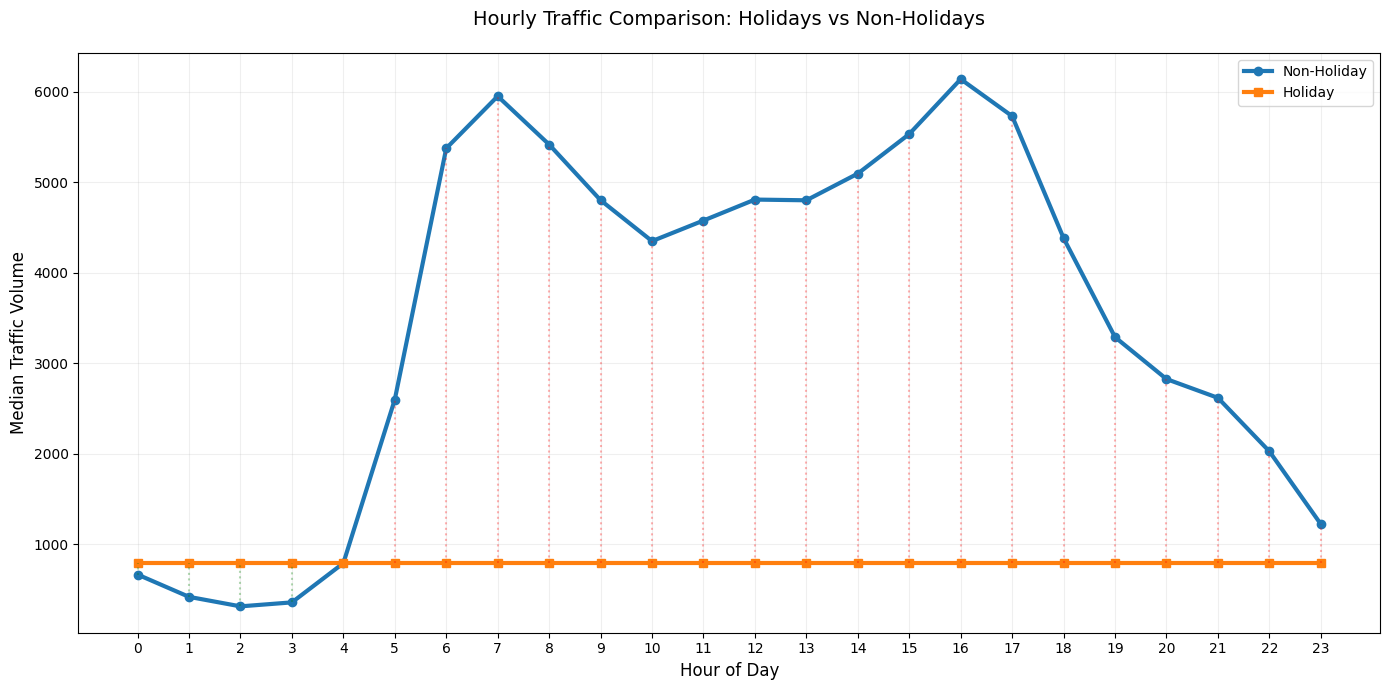

In [46]:
plt.figure(figsize=(14, 7))

# Filter and group data
holiday_data = weekday_df[weekday_df['is_holiday'] != 'No']
non_holiday_data = weekday_df[weekday_df['is_holiday'] == 'No']

# Calculate hourly medians
holiday_hourly = holiday_data.groupby('hour')['traffic_volume'].median()
non_holiday_hourly = non_holiday_data.groupby('hour')['traffic_volume'].median()

# Reindex holiday_hourly to have all hours (0-23)
holiday_hourly = holiday_hourly.reindex(range(24), fill_value=holiday_hourly.mean())

# Plot with enhanced styling
plt.plot(non_holiday_hourly.index, non_holiday_hourly,
         label='Non-Holiday', color='#1f77b4', linewidth=3, marker='o')
plt.plot(holiday_hourly.index, holiday_hourly,
         label='Holiday', color='#ff7f0e', linewidth=3, marker='s')

# Highlight key differences
for hour in range(24):
    diff = holiday_hourly[hour] - non_holiday_hourly[hour]
    color = 'red' if diff < 0 else 'green'
    plt.vlines(x=hour,
               ymin=min(holiday_hourly[hour], non_holiday_hourly[hour]),
               ymax=max(holiday_hourly[hour], non_holiday_hourly[hour]),
               colors=color,
               linestyles=':',
               alpha=0.3)

# Formatting
plt.title('Hourly Traffic Comparison: Holidays vs Non-Holidays', pad=20, fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Median Traffic Volume', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-47-aa45783edcee>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weather_type', y='traffic_volume', estimator='median', ci=None)


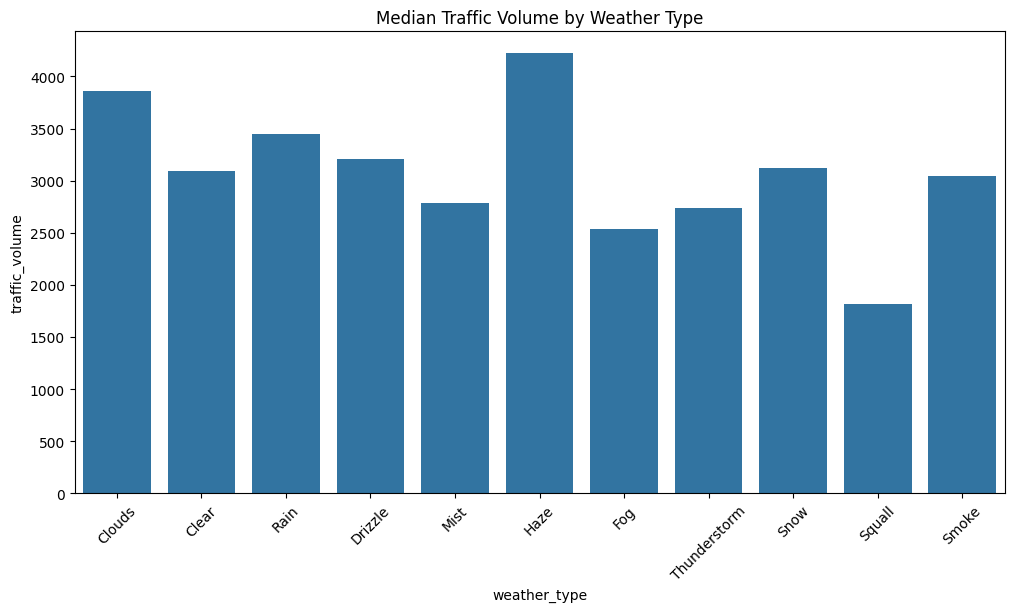

In [47]:
# Weather v/s Traffic times
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='weather_type', y='traffic_volume', estimator='median', ci=None)
plt.title('Median Traffic Volume by Weather Type')
plt.xticks(rotation=45)
plt.show()

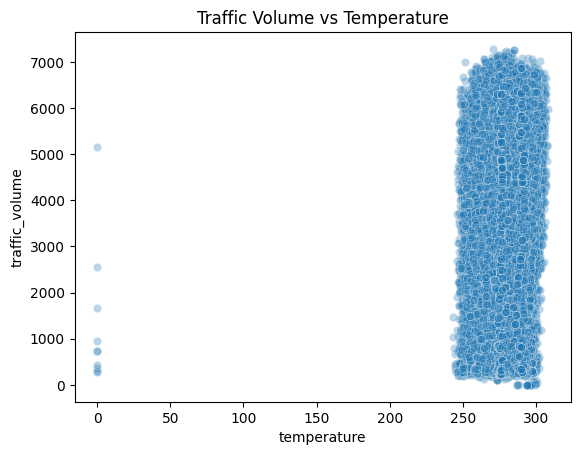

In [48]:
# Temperature Correlation
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='temperature', y='traffic_volume', alpha=0.3, hue='time_of_day')
# plt.title('Traffic Volume vs Temperature')
# plt.show()

sns.scatterplot(data=data, x='temperature', y='traffic_volume', alpha=0.3)
plt.title('Traffic Volume vs Temperature')
plt.show()

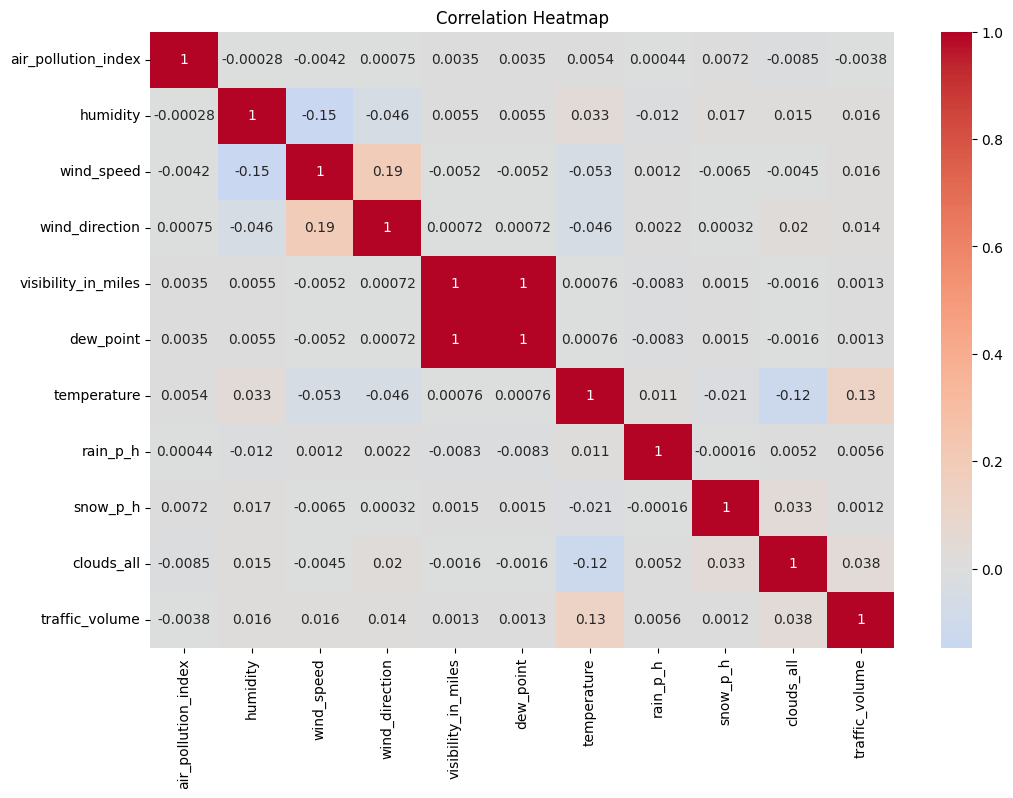

<Figure size 640x480 with 0 Axes>

In [69]:
# Multivariate Correlations
# Heatmap of Correlations
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

plt.savefig('Correlation_heatmap.jpg', dpi=300)

<Figure size 1000x600 with 0 Axes>

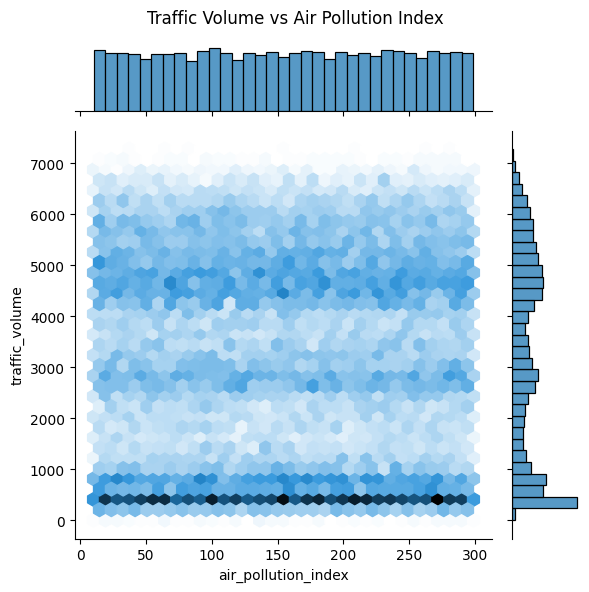

In [50]:
# Pollution and Traffic
plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='air_pollution_index', y='traffic_volume', kind='hex')
plt.suptitle('Traffic Volume vs Air Pollution Index')
plt.tight_layout()
plt.show()


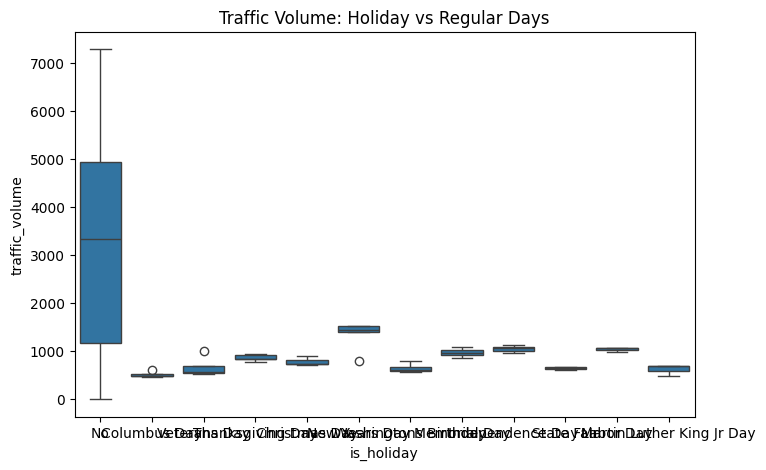

In [51]:
# Special cases
# Holidays v/s Non-Holiday
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_holiday', y='traffic_volume')
plt.title('Traffic Volume: Holiday vs Regular Days')
plt.show()

<ipython-input-52-d9be2d4ca7e8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='visibility_in_miles', y='traffic_volume', ci=None)


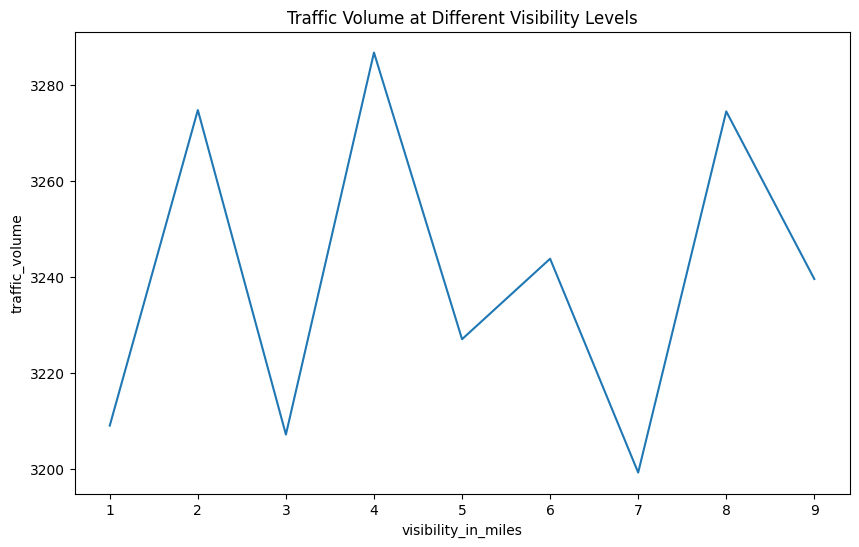

In [52]:
# Visibility Impact
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='visibility_in_miles', y='traffic_volume', ci=None)
plt.title('Traffic Volume at Different Visibility Levels')
plt.show()

<ipython-input-53-1d0648c5ab7b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='hour', y='traffic_volume', ci=None)


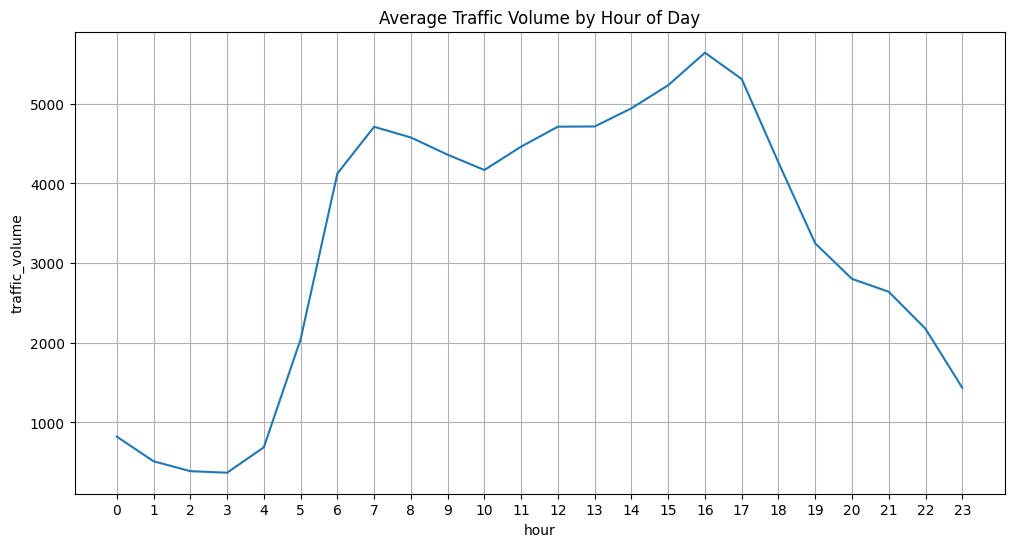

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='hour', y='traffic_volume', ci=None)
plt.title('Average Traffic Volume by Hour of Day')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

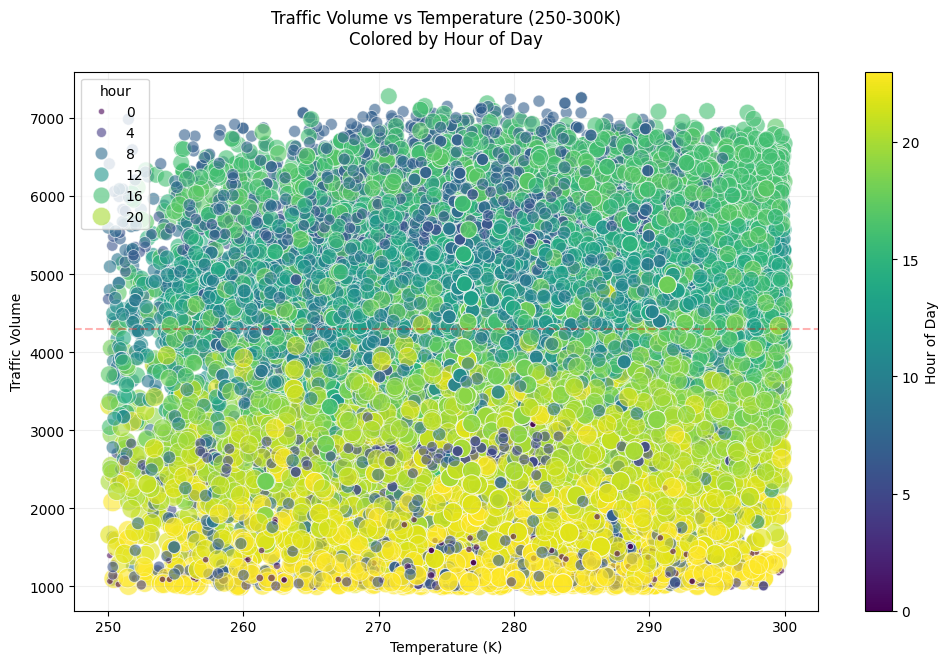

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out low-traffic outliers and focus on 250-300K temperature range
filtered_df = data[(data['traffic_volume'] > 1000) &
                 (data['temperature'] >= 250) &
                 (data['temperature'] <= 300)]

# Create the plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=filtered_df,
    x='temperature',
    y='traffic_volume',
    hue='hour',
    palette='viridis',
    alpha=0.6,
    size='hour',  # Add size variation for better hour distinction
    sizes=(20, 200)  # Min/max point sizes
)

# Customize the plot
plt.title('Traffic Volume vs Temperature (250-300K)\nColored by Hour of Day', pad=20)
plt.xlabel('Temperature (K)')
plt.ylabel('Traffic Volume')
plt.axhline(y=filtered_df['traffic_volume'].median(), color='red', linestyle='--', alpha=0.3)
plt.grid(alpha=0.2)

# Add colorbar for hour reference
norm = plt.Normalize(filtered_df['hour'].min(), filtered_df['hour'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Hour of Day', ax=plt.gca())

plt.show()

<Axes: >

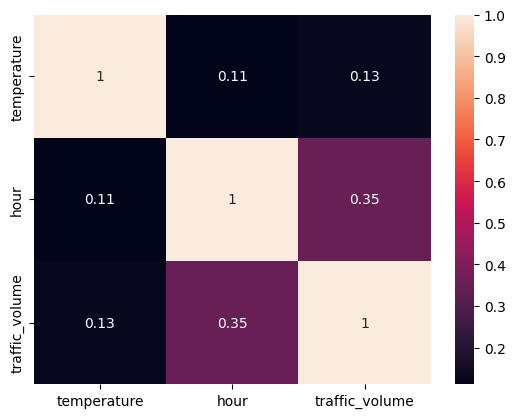

In [55]:
sns.heatmap(data[['temperature', 'hour', 'traffic_volume']].corr(), annot=True)

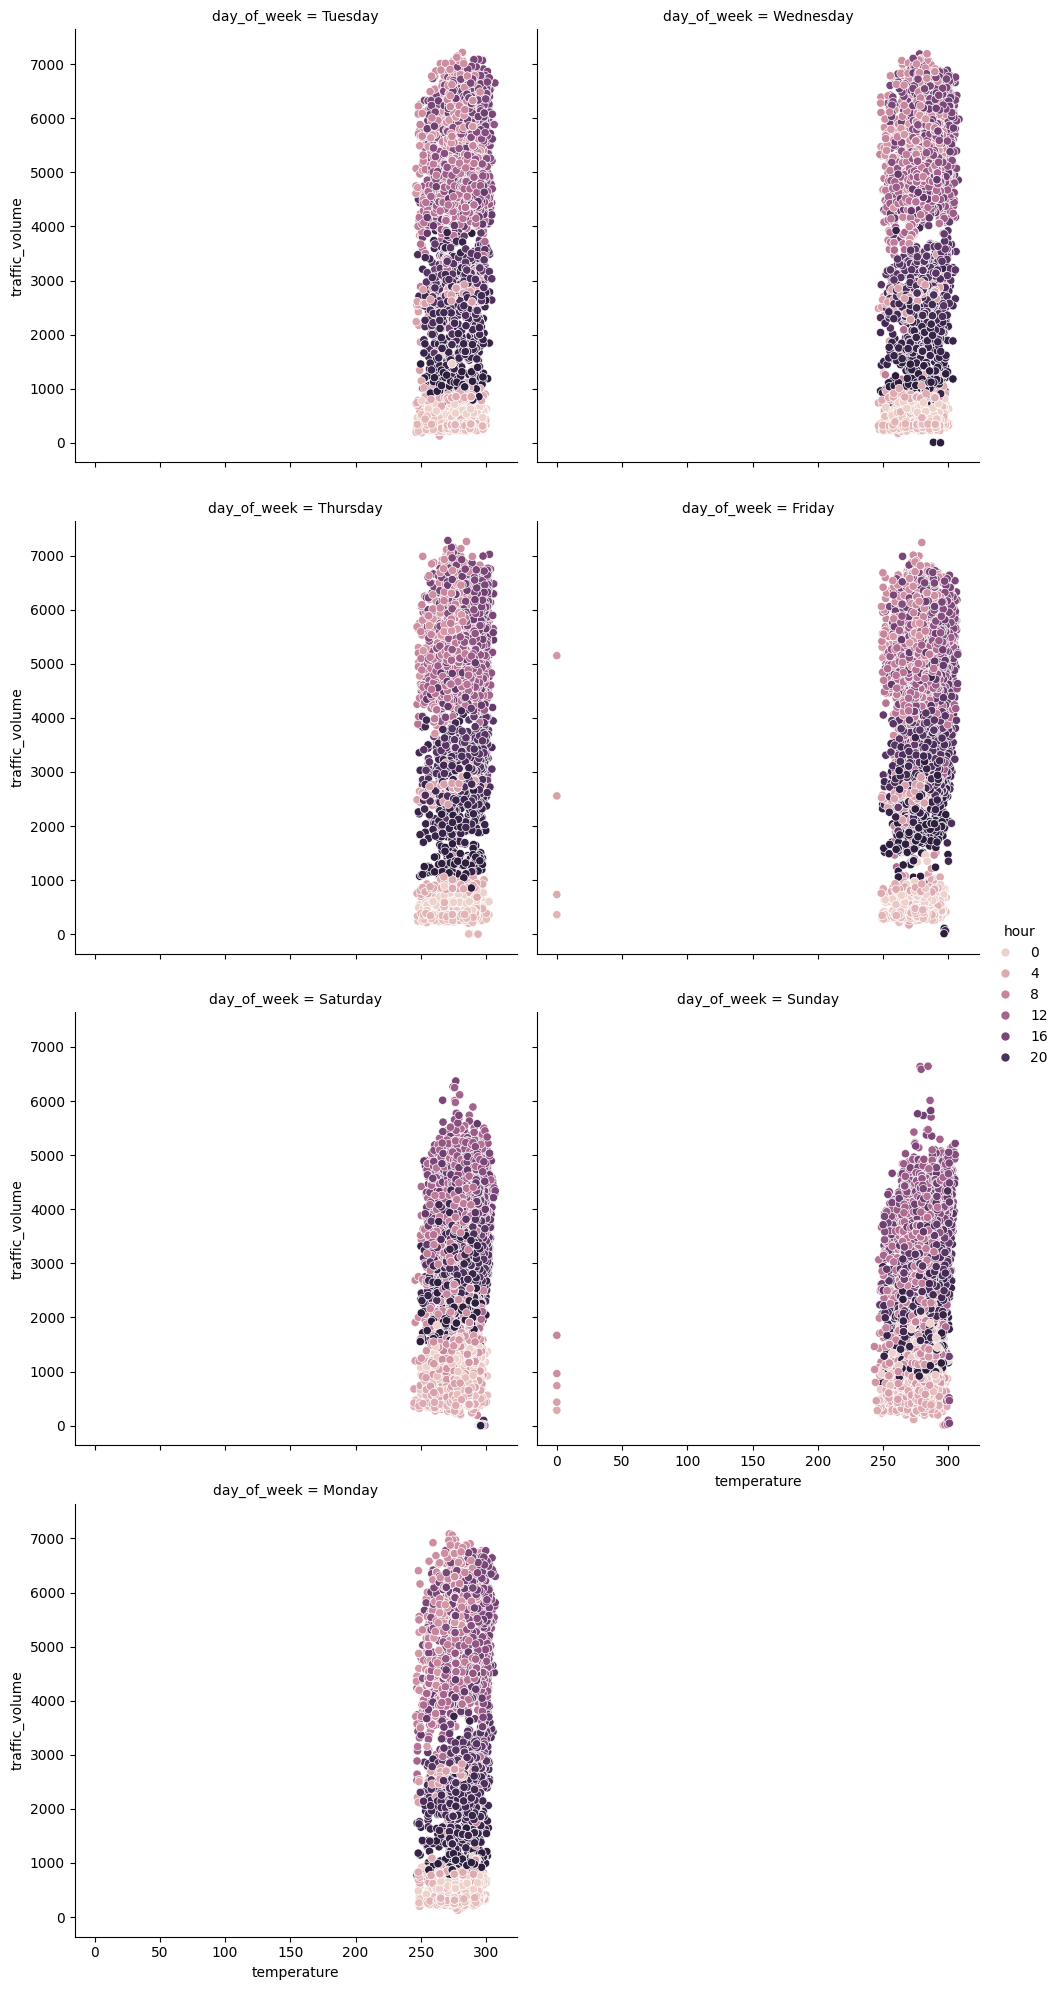

In [56]:
sns.relplot(data=data, x='temperature', y='traffic_volume',
           hue='hour', col='day_of_week', col_wrap=2)

<Axes: xlabel='hour', ylabel='traffic_volume'>

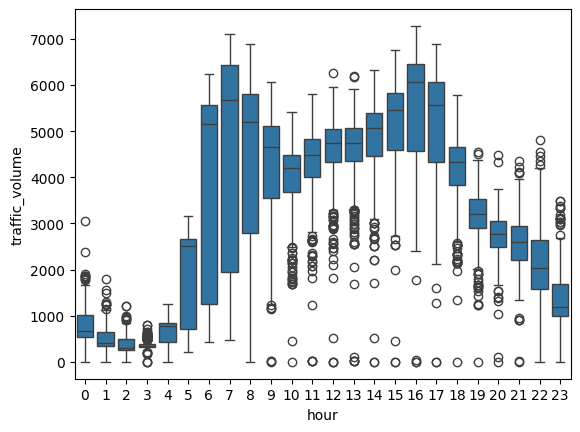

In [57]:
extreme_df = data[(data['temperature'] < 275) | (data['temperature'] > 295)]
sns.boxplot(data=extreme_df, x='hour', y='traffic_volume')

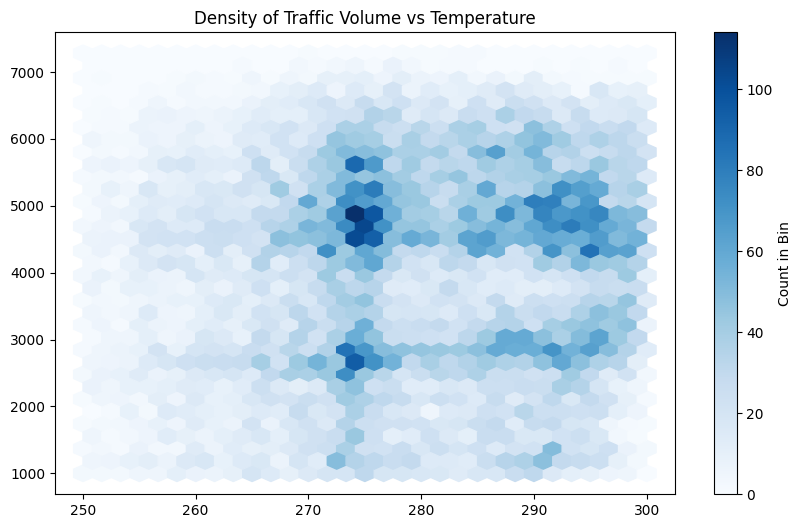

<ipython-input-58-16f824ddd4af>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['temp_bin'] = pd.cut(filtered_df['temperature'], bins=10)


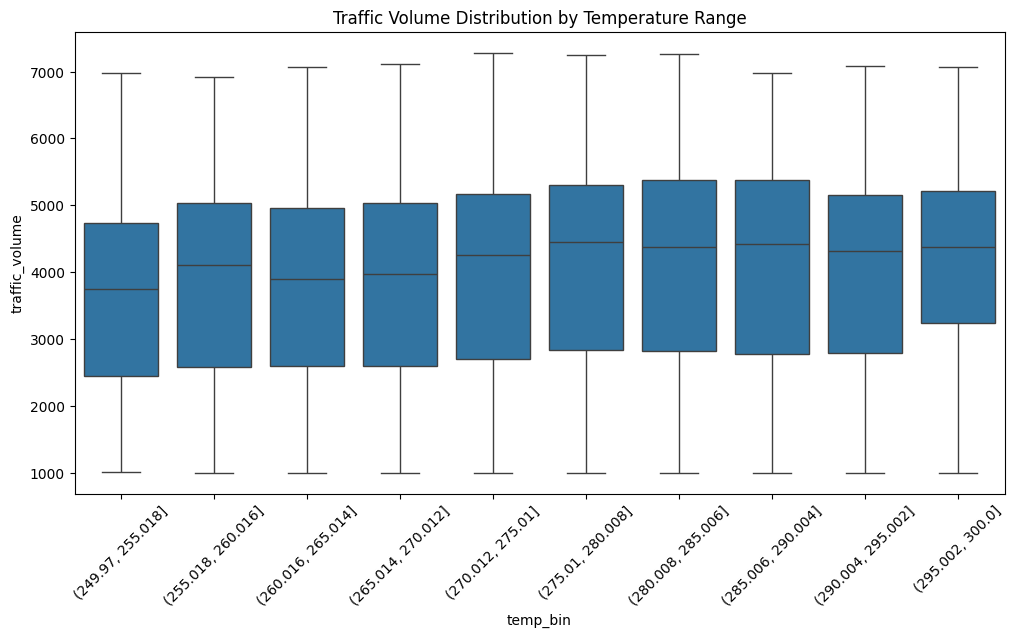

In [58]:
# 1. Hexbin plot for density visualization
plt.figure(figsize=(10, 6))
plt.hexbin(x=filtered_df['temperature'],
           y=filtered_df['traffic_volume'],
           gridsize=30,
           cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Density of Traffic Volume vs Temperature')
plt.show()

# 2. Boxplot by temperature bins
filtered_df['temp_bin'] = pd.cut(filtered_df['temperature'], bins=10)
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='temp_bin', y='traffic_volume')
plt.xticks(rotation=45)
plt.title('Traffic Volume Distribution by Temperature Range')
plt.show()